In [1]:
# import libraries

import pandas as pd
import numpy as np
from statistics import geometric_mean

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# import result sets
df_nocuts = pd.read_csv("results_0.csv")
df_cuts = pd.read_csv("results_1.csv")

In [3]:
# #Gap Closed
# df_nocuts['DIG_num'] = abs(df_nocuts['OBJECTIVE VALUE ROOT NODE'] - df_nocuts['INITIAL LP'])
# df_nocuts['DIG'] = df_nocuts['DIG_num'] / (abs(df_nocuts[['OBJECTIVE VALUE ROOT NODE', 'INITIAL LP', 'DIG_num']].max(axis = 1))) 
# df_nocuts['PDG_num'] = abs(df_nocuts['BEST PRIMAL BOUND'] - df_nocuts['OBJECTIVE VALUE ROOT NODE'])
# df_nocuts['PDG'] = df_nocuts['PDG_num'] / (abs(df_nocuts[['OBJECTIVE VALUE ROOT NODE', 'BEST PRIMAL BOUND', 'PDG_num']].max(axis = 1))) 
# df_nocuts['GC'] = 1 - (df_nocuts['PDG']/df_nocuts['DIG'])

# df_cuts['DIG_num'] = abs(df_cuts['OBJECTIVE VALUE ROOT NODE'] - df_cuts['INITIAL LP'])
# df_cuts['DIG'] = df_cuts['DIG_num'] / (abs(df_cuts[['OBJECTIVE VALUE ROOT NODE', 'INITIAL LP', 'DIG_num']].max(axis = 1))) 
# df_cuts['PDG_num'] = abs(df_cuts['BEST PRIMAL BOUND'] - df_cuts['OBJECTIVE VALUE ROOT NODE'])
# df_cuts['PDG'] = df_cuts['PDG_num'] / (abs(df_cuts[['OBJECTIVE VALUE ROOT NODE', 'BEST PRIMAL BOUND', 'PDG_num']].max(axis = 1))) 
# df_cuts['GC'] = 1 - (df_cuts['PDG']/df_cuts['DIG'])


# df_nocuts['remaining_gap'] = abs(df_nocuts['BEST PRIMAL BOUND'] - df_nocuts['BEST SOLUTION']) / abs(df_nocuts['BEST PRIMAL BOUND'] - df_nocuts['INITIAL LP']) * 100
# df_cuts['remaining_gap'] = abs(df_cuts['BEST PRIMAL BOUND'] - df_cuts['BEST SOLUTION']) / abs(df_cuts['BEST PRIMAL BOUND'] - df_cuts['INITIAL LP']) * 100
# df_cuts.to_csv('df_cuts.csv')

In [4]:
# keep instances that are solved for each of the five random seeds
max_repeat = 5
count_nocuts = df_nocuts['NAME'].value_counts()
count_cuts = df_cuts['NAME'].value_counts()
df_nocuts = df_nocuts[df_nocuts['NAME'].isin(count_nocuts[count_nocuts == max_repeat].index)]
df_cuts = df_cuts[df_cuts['NAME'].isin(count_cuts[count_cuts == max_repeat].index)]

# keep instances that are solved by both cut settings 
df_nocuts_new = df_nocuts.loc[df_nocuts.NAME.isin(df_cuts.NAME)]
df_cuts_new = df_cuts.loc[df_cuts.NAME.isin(df_nocuts.NAME)]

# 642 instances * 5 
print(df_cuts_new.shape)
print(df_nocuts_new.shape)

df_nocuts_new

(3210, 18)
(3210, 18)


,NAME,INITIAL LP,FIRST ROUND CUT,ROUND OF CUTS,OBJECTIVE VALUE ROOT NODE,BEST SOLUTION,SOLUTION TIME,PRESOLVING TIME,BEST PRIMAL BOUND,GAP,No. OF CUTS GENERATED,No. OF CUTS APPLIED,No. OF CUTS PRESENT IN LP AT THE END,No. OF NODES,RANDOM SEED,CUT SETTING,STATUS,END
0,10teams.mps.gz,20.0,0,0,917.0,924.0,12.212530,0.062201,9.240000e+02,0.000000e+00,210,0,0,276,2,0,optimal,DONE
1,10teams.mps.gz,20.0,0,0,917.0,924.0,12.444448,0.060087,9.240000e+02,0.000000e+00,210,0,0,276,4,0,optimal,DONE
2,10teams.mps.gz,20.0,0,0,917.0,924.0,12.331489,0.058780,9.240000e+02,0.000000e+00,210,0,0,276,8,0,optimal,DONE
3,10teams.mps.gz,20.0,0,0,917.0,924.0,12.467186,0.059116,9.240000e+02,0.000000e+00,210,0,0,276,16,0,optimal,DONE
4,10teams.mps.gz,20.0,0,0,917.0,924.0,12.477946,0.058801,9.240000e+02,0.000000e+00,210,0,0,276,32,0,optimal,DONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,woodlands09.mps.gz,0.0,0,0,0.0,0.0,18000.085760,24.112732,1.000000e+20,1.000000e+20,15742,0,0,1,2,0,timelimit,DONE
3230,woodlands09.mps.gz,0.0,0,0,0.0,0.0,18000.132740,36.634436,1.000000e+20,1.000000e+20,15742,0,0,1,4,0,timelimit,DONE
3231,woodlands09.mps.gz,0.0,0,0,0.0,0.0,18000.088870,28.527020,1.000000e+20,1.000000e+20,15742,0,0,1,8,0,timelimit,DONE
3232,woodlands09.mps.gz,0.0,0,0,0.0,0.0,18000.128380,28.580831,1.000000e+20,1.000000e+20,15742,0,0,1,16,0,timelimit,DONE


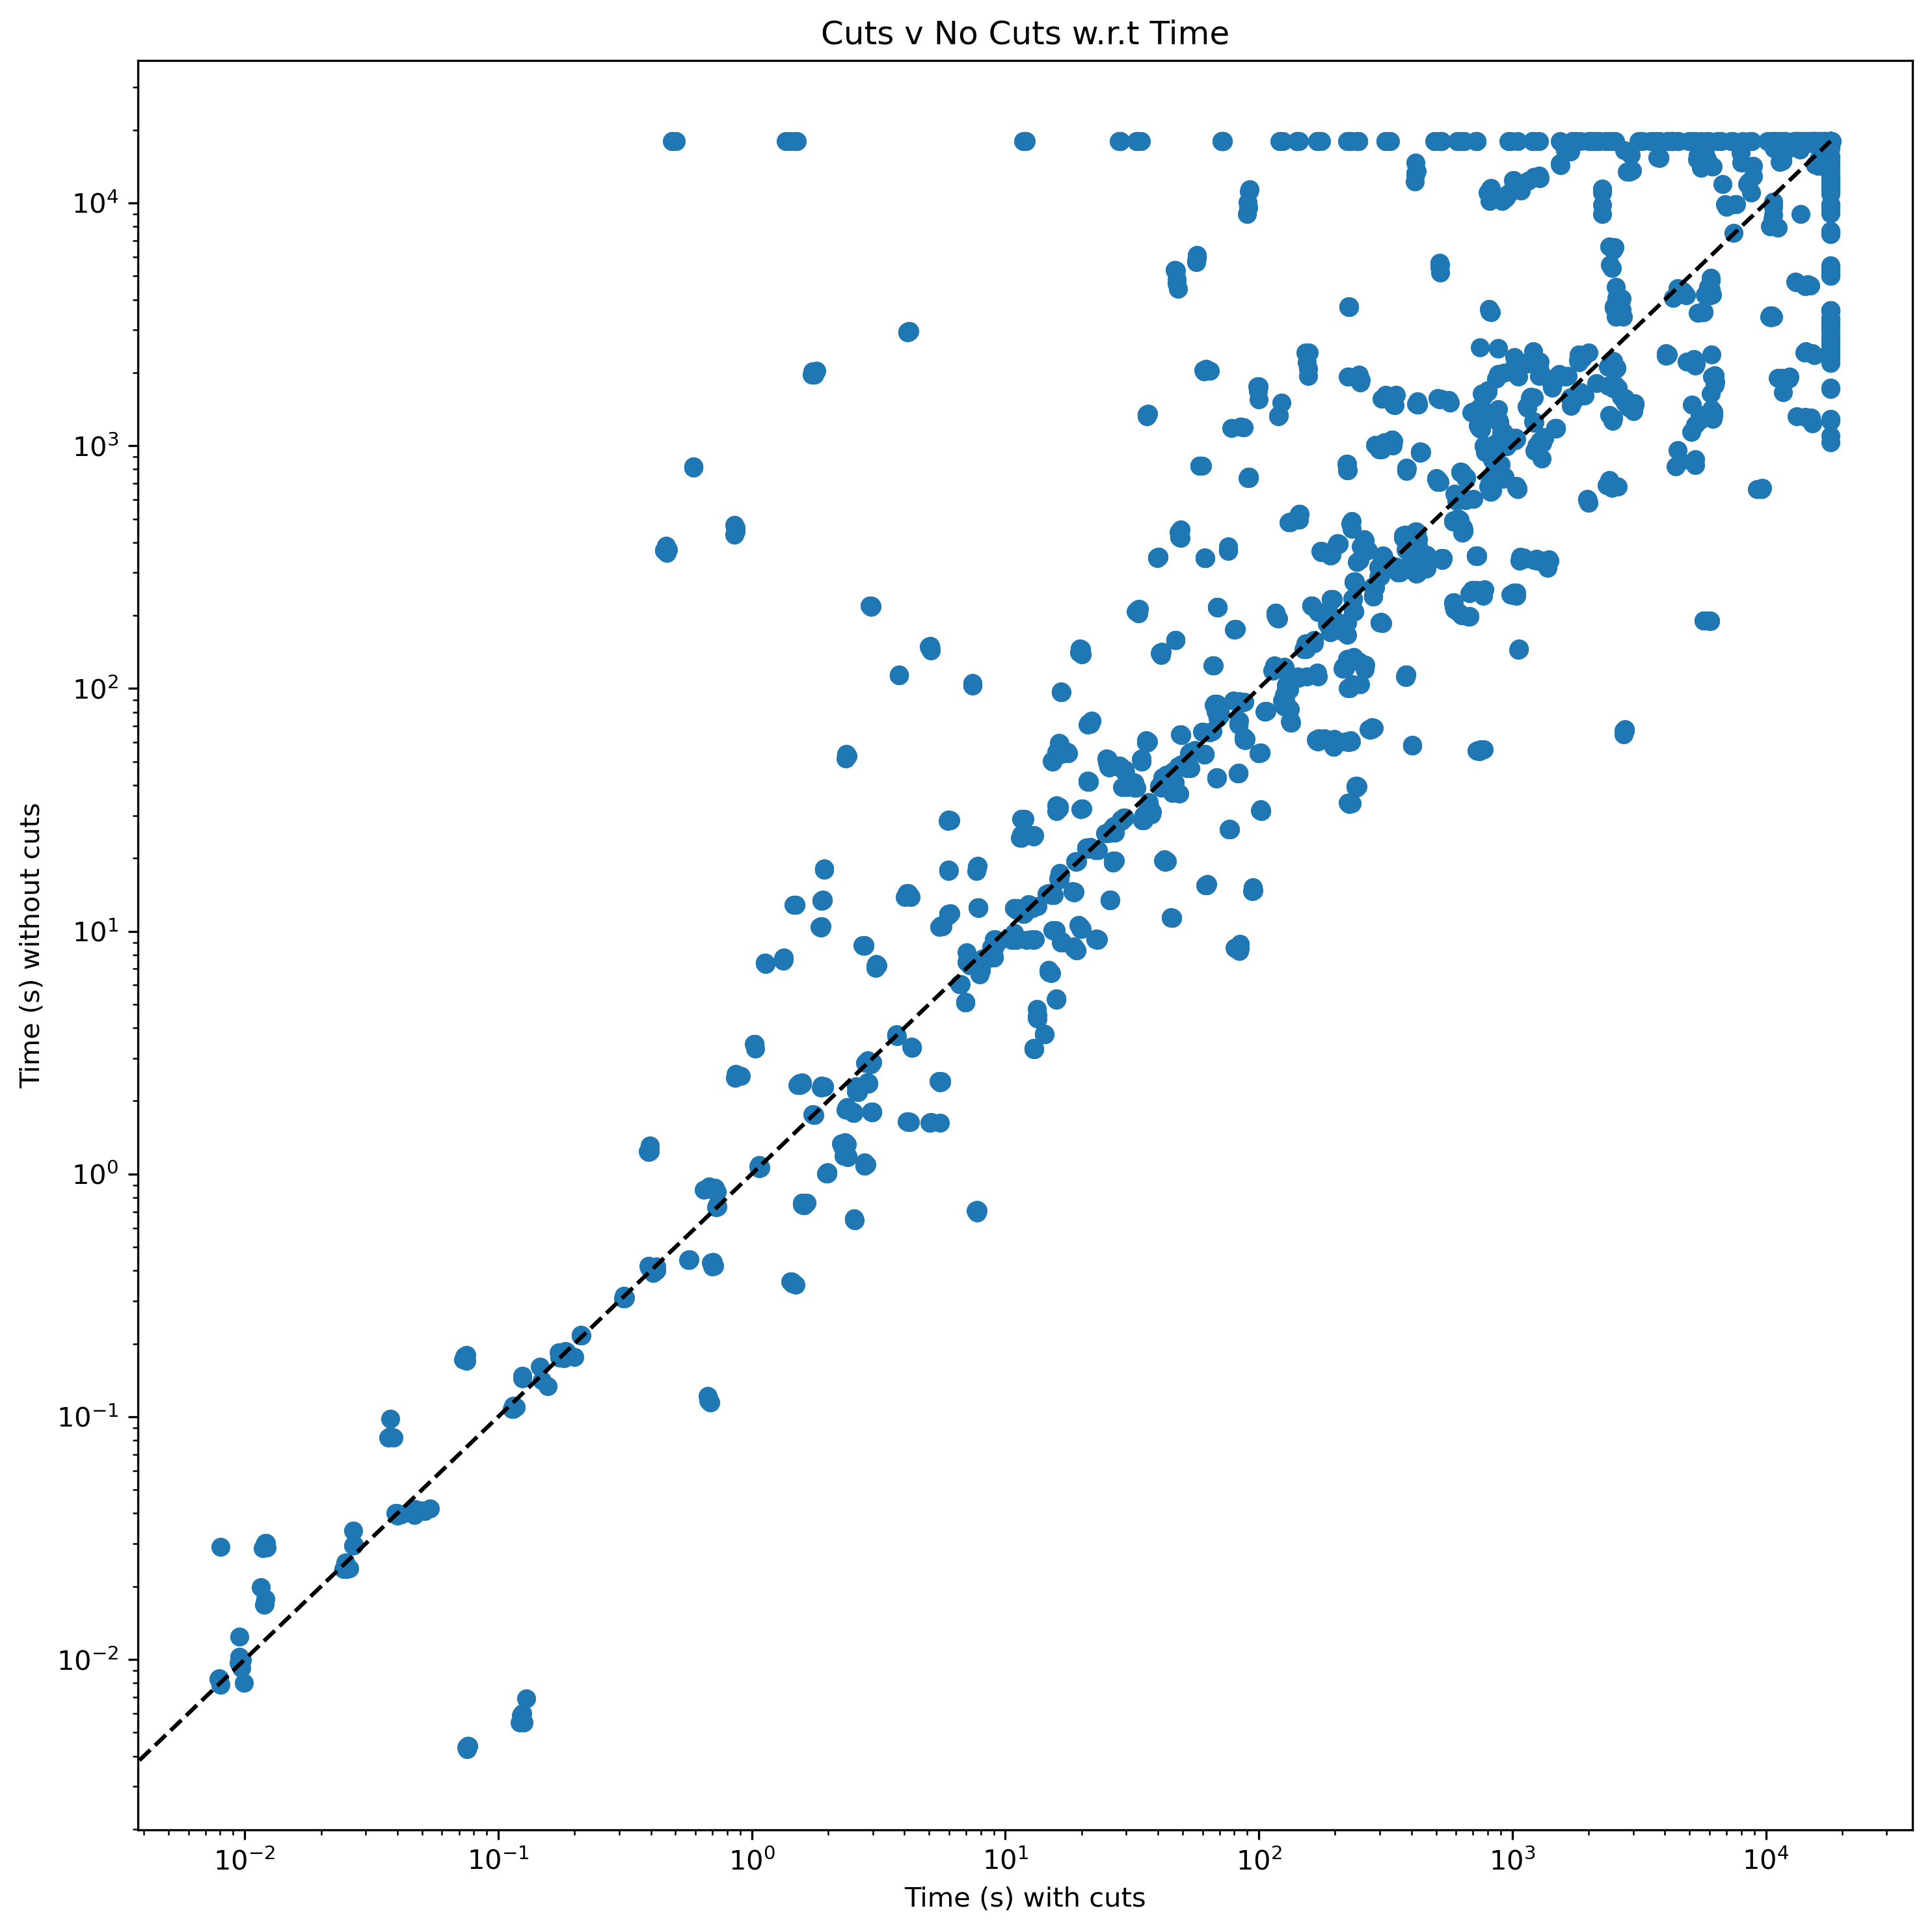

<Figure size 432x288 with 0 Axes>

In [5]:
minx = 0
maxx = 18000

plt.figure(figsize=(10, 10), dpi=300)
plt.scatter(x=df_cuts_new['SOLUTION TIME'], y=df_nocuts_new['SOLUTION TIME'])
# plt.scatter(x=hard['TIME W/ CUTS'], y=hard['TIME W/O CUTS'])
# plt.legend(["easy" , "hard"], bbox_to_anchor = (1 , 1))

plt.plot(range(int(minx),int(maxx)),range(int(minx),int(maxx)),'--', color='black')

plt.title('Cuts v No Cuts w.r.t Time')
plt.xlabel('Time (s) with cuts')
plt.ylabel('Time (s) without cuts')



fig = plt.gcf()

ax_list=fig.axes
ax=ax_list[0]
ax.set_xscale("log")
ax.set_yscale("log")
plt.tight_layout()
plt.show()
plt.draw()
fname = "originaldf"
fig.savefig(fname, dpi=300)

In [6]:
# check if total instances in both settings are same
total_instances = 0
if len(df_cuts_new) == len(df_nocuts_new):
    total_instances += len(df_cuts_new)

print('Total instances:', total_instances)

# General Statistics
solved_cuts = df_cuts_new[(df_cuts_new["SOLUTION TIME"] < 18000)]
solved_nocuts = df_nocuts_new[(df_nocuts_new["SOLUTION TIME"] < 18000)]

unsolved_cuts = df_cuts_new[(df_cuts_new["SOLUTION TIME"] >= 18000)]
unsolved_nocuts = df_nocuts_new[(df_nocuts_new["SOLUTION TIME"] >= 18000)]


print('Instances Solved Using Cuts:', len(solved_cuts))
print('Instances Solved Using No Cuts:', len(solved_nocuts))

print('Instances Unsolved Using Cuts:', len(unsolved_cuts))
print('Instances Unsolved Using No Cuts:', len(unsolved_nocuts))

print('\n')

print('Percentage of Instances Solved Using Cuts:', (len(solved_cuts) / total_instances)*100)
print('Percentage of Instances Solved Using No Cuts:', (len(solved_nocuts) / total_instances)*100)

print('Percentage of Instances Unsolved Using Cuts:', (len(unsolved_cuts) / total_instances)*100)
print('Percentage of Instances Unsolved Using No Cuts:', (len(unsolved_nocuts) / total_instances)*100)

print('\n')

df_merged = df_cuts_new.merge(df_nocuts_new, on = ['NAME', 'RANDOM SEED'], how = 'left')

solved_both = df_merged[(df_merged['SOLUTION TIME_x'] < 18000) & (df_merged['SOLUTION TIME_y'] < 18000)]
print('Instances Solved for both settings:', len(solved_both))
solved_both.to_csv('solved.csv')
unsolved_both = df_merged[(df_merged['SOLUTION TIME_x'] >= 18000) & (df_merged['SOLUTION TIME_y'] >= 18000)]
print('Instances Unsolved for both settings:', len(unsolved_both))


solved_cuts = df_merged[(df_merged['SOLUTION TIME_x'] < 18000) & (df_merged['SOLUTION TIME_y'] >= 18000)]
print('Instances Solved for Cuts but not for No Cuts:', len(solved_cuts))

solved_nocuts = df_merged[(df_merged['SOLUTION TIME_x'] >= 18000) & (df_merged['SOLUTION TIME_y'] < 18000)]
print('Instances Solved for No Cuts but not for Cuts:', len(solved_nocuts))

print('\n')

print('Percentage of Instances Solved or Unsolved for both settings:', ((len(solved_both)+len(unsolved_both)) / total_instances)*100)
print('Percentage of Instances Solved by Cuts out of remaining instances:', ((len(solved_cuts) / (total_instances - (len(solved_both) + len(unsolved_both)))) * 100))
print('Percentage of Instances Solved by No Cuts out of remaining instances:', ((len(solved_nocuts) / (total_instances - (len(solved_both) + len(unsolved_both)))) * 100))

print('\n')

# Excluding instances that solve within 10% of the time of either settings
cuts_win = df_merged[(df_merged['SOLUTION TIME_x'] < 0.9 * df_merged['SOLUTION TIME_y'])]
nocuts_win = df_merged[(df_merged['SOLUTION TIME_y'] < 0.9 * df_merged['SOLUTION TIME_x'])]

print('Cuts Outperform No Cuts:', len(cuts_win))
print('No Cuts Outperform Cuts:', len(nocuts_win))
print('Percentage Cuts Outperforms:', (len(cuts_win) / total_instances)*100)
print('Percentage No Cuts Outperforms:', (len(nocuts_win) / total_instances)*100)

Total instances: 3210
Instances Solved Using Cuts: 2041
Instances Solved Using No Cuts: 1855
Instances Unsolved Using Cuts: 1169
Instances Unsolved Using No Cuts: 1355


Percentage of Instances Solved Using Cuts: 63.58255451713396
Percentage of Instances Solved Using No Cuts: 57.78816199376947
Percentage of Instances Unsolved Using Cuts: 36.41744548286604
Percentage of Instances Unsolved Using No Cuts: 42.21183800623053


Instances Solved for both settings: 1778
Instances Unsolved for both settings: 1092
Instances Solved for Cuts but not for No Cuts: 263
Instances Solved for No Cuts but not for Cuts: 77


Percentage of Instances Solved or Unsolved for both settings: 89.40809968847351
Percentage of Instances Solved by Cuts out of remaining instances: 77.3529411764706
Percentage of Instances Solved by No Cuts out of remaining instances: 22.647058823529413


Cuts Outperform No Cuts: 992
No Cuts Outperform Cuts: 775
Percentage Cuts Outperforms: 30.903426791277262
Percentage No Cuts Outperf

In [7]:
# Geometric Shifted Mean for Time and Nodes
SHIFT_TIME = 60
SHIFT_NODES = 1000

df = [df_cuts_new, df_nocuts_new]
# cut_setting = [cuts, nocuts]
time = []
nodes = []
for data in df:
    time_ = data['SOLUTION TIME'].tolist()
    timeshift = [i + SHIFT_TIME for i in time_]
    time_geom = geometric_mean(timeshift) - SHIFT_TIME
    time.append(time_geom)
    
    nodes_ = data['No. OF NODES'].tolist()
    nodeshift = [i + SHIFT_NODES for i in nodes_]
    nodes_geom = geometric_mean(nodeshift) - SHIFT_NODES
    nodes.append(nodes_geom)
    
print(time)  
print(nodes)

print('Cuts is faster than No Cuts by (%):', 
      ((time[1] - time[0]) / time[1])*100)
print('Cuts explores fewer nodes than No Cuts by (%):', 
      ((nodes[1] - nodes[0]) / nodes[1])*100)
pd.set_option('display.max_columns', None)

[1389.583626428008, 1778.711039231674]
[7795.388344714367, 19812.47719075887]
Cuts is faster than No Cuts by (%): 21.876932465194127
Cuts explores fewer nodes than No Cuts by (%): 60.654146022939685


CREATING SETS:

SET 1: All runs of each instance solves before the timeout i.e. solve before 18000s

SET 2: At least one and at most 9 runs of each instance timeout

SET 3: Union of SETS 1 and 2

SET 4: All 10 runs timeout

In [8]:
# SET 1

vc = solved_both['NAME'].value_counts()
analysis_set_1 = solved_both[solved_both['NAME'].isin(vc[vc == max_repeat].index)]

analysis_set_1 = analysis_set_1[['NAME', "RANDOM SEED", "SOLUTION TIME_x", "No. OF NODES_x", "SOLUTION TIME_y", "No. OF NODES_y", 
                                 "GAP_x", "GAP_y"]]
analysis_set_1.rename(columns={'SOLUTION TIME_x': 'TIME W/ CUTS', 'No. OF NODES_x': 'NODES W/ CUTS', 
                               'SOLUTION TIME_y': 'TIME W/O CUTS', 'No. OF NODES_y': 'NODES W/O CUTS', "GAP_x":"GAP W/ CUTS", 
                               "GAP_y":"GAP W/O CUTS"
                              }, inplace=True)
analysis_set_1['Minimum Time'] = analysis_set_1[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis_set_1['Minimum Nodes'] = analysis_set_1[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis_set_1
#analysis_set_1.to_csv('analysis_set_1.csv')

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,GAP W/ CUTS,GAP W/O CUTS,Minimum Time,Minimum Nodes
0,10teams.mps.gz,2,11.088517,30,12.212530,276,0.0,0.0,11.088517,30
1,10teams.mps.gz,4,11.186637,30,12.444448,276,0.0,0.0,11.186637,30
2,10teams.mps.gz,8,11.044666,30,12.331489,276,0.0,0.0,11.044666,30
3,10teams.mps.gz,16,10.835616,30,12.467186,276,0.0,0.0,10.835616,30
4,10teams.mps.gz,32,10.833424,30,12.477946,276,0.0,0.0,10.833424,30
...,...,...,...,...,...,...,...,...,...,...
3195,wachplan.mps.gz,2,1427.930347,67520,1801.604630,98056,0.0,0.0,1427.930347,67520
3196,wachplan.mps.gz,4,1444.662760,67520,1804.842432,98056,0.0,0.0,1444.662760,67520
3197,wachplan.mps.gz,8,1431.659624,67520,1737.152014,98056,0.0,0.0,1431.659624,67520
3198,wachplan.mps.gz,16,1433.459125,67520,1758.587956,98056,0.0,0.0,1433.459125,67520


In [9]:
# Splitting the instances into buckets 
df_0 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 0)]
df_10 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 10)]
df_100 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 100)]
df_1000 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 1000)]
df_3600 = analysis_set_1[(analysis_set_1['Minimum Time'] >= 3600)]

In [10]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
n_cuts = []
n_nocuts = []
n_perfect = []
instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    time_shift_perfect = [i + SHIFT_TIME for i in time_perfect]
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(time_shift_perfect) - SHIFT_TIME
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    
    instances.append(len(data))

In [11]:
bb_classes = ['Geometric Mean']
num_bb_classes = len(bb_classes)

bucket_min = [0, 10, 100, 1000, 3600]
bucket_max = [18000, 18000, 18000, 18000, 18000]
num_buckets = len(bucket_min)
assert(len(bucket_max) == num_buckets)
bb_buckets = ['[' + str(bucket_min[j]) + ',' + str(bucket_max[j]) + ')' for j in range(num_buckets)]

bb_metrics = ['Gmean']

In [12]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts
avg_bb_df[('Time', 'Perfect')] = t_perfect
avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts
avg_bb_df[('Node', 'Perfect')] = n_perfect


avg_bb_df

Parameter                           Time                            \
Setting                              Cut       No Cut      Perfect   
Metric         Bucket                                                
Geometric Mean [0,18000)      196.627866   244.701124   152.423256   
               [10,18000)     368.163497   443.639538   273.618091   
               [100,18000)    920.036004  1047.461767   670.656853   
               [1000,18000)  3375.654161  3727.537136  2383.116172   
               [3600,18000)  7925.674500  9652.217131  6768.692186   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      3106.453952    7967.012311   2735.949945   
               [10,18000)     5605.053776   13840.151057   4807.364567   
               [100,18000)   10451.995680   21944.524800   8864.719143   
               [1000,18000)  47434.682145  100956.239613  37833.947697   
               [3600,18000)  92018.347853  192284.003111  73627.442382   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)         1775  
               [10,18000)        1295  
               [100,18000)        790  
               [1000,18000)       277  
               [3600,18000)        70

In [13]:
# SET 2
set_2 = pd.concat([df_cuts_new, df_nocuts_new])
set_2 = set_2.sort_values(by = ['NAME', 'CUT SETTING'], ascending = True)


counts = set_2['NAME'].value_counts()
res = set_2[~set_2['NAME'].isin(counts[counts < 10].index)]

dic = dict()
for index, row in res.iterrows():
    if row['SOLUTION TIME'] > 18000:
        if row['NAME'] in dic:
            dic[row['NAME']] += 1
        else:
            dic[row["NAME"]] = 1
        if dic[row['NAME']] == 10:
            del dic[row['NAME']]
# dic
set_2_nocuts = df_nocuts_new[df_nocuts_new['NAME'].isin(dic.keys())]
set_2_cuts = df_cuts_new[df_cuts_new['NAME'].isin(dic.keys())]

analysis_set_2 = set_2_cuts.merge(set_2_nocuts, on = ['NAME', 'RANDOM SEED'], how = 'left')
analysis_set_2 = analysis_set_2[['NAME', "RANDOM SEED", "SOLUTION TIME_x", "No. OF NODES_x", "SOLUTION TIME_y", "No. OF NODES_y",
                                "GAP_x", "GAP_y"]]
analysis_set_2.rename(columns={'SOLUTION TIME_x': 'TIME W/ CUTS', 'No. OF NODES_x': 'NODES W/ CUTS', 
                               'SOLUTION TIME_y': 'TIME W/O CUTS', 'No. OF NODES_y': 'NODES W/O CUTS',
                              "GAP_x":"GAP W/ CUTS", "GAP_y":"GAP W/O CUTS"}, inplace=True)
analysis_set_2['Minimum Time'] = analysis_set_2[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis_set_2['Minimum Nodes'] = analysis_set_2[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

In [14]:
factor = 1
time_cuts = []
time_nocuts = []
for index, row in analysis_set_2.iterrows():
    if row['TIME W/ CUTS'] >= 18000:
        time_cuts.append(row['TIME W/ CUTS'] * factor)
    else:
        time_cuts.append(row['TIME W/ CUTS'])
        
    if row['TIME W/O CUTS'] >= 18000:
        time_nocuts.append(row['TIME W/O CUTS'] * factor)
    else:
        time_nocuts.append(row['TIME W/O CUTS'])

analysis_set_2['TIME W/ CUTS'] = time_cuts
analysis_set_2['TIME W/O CUTS'] = time_nocuts

analysis_set_2
analysis_set_2.to_csv('analysis_set_2.csv')

In [15]:
df_0 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 0)]
df_10 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 10)]
df_100 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 100)]
df_1000 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 1000)]
df_3600 = analysis_set_2[(analysis_set_2['Minimum Time'] >= 3600)]

In [16]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
n_cuts = []
n_nocuts = []
n_perfect = []
instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    time_shift_perfect = [i + SHIFT_TIME for i in time_perfect]
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(time_shift_perfect) - SHIFT_TIME
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    
    instances.append(len(data))

In [17]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts
avg_bb_df[('Time', 'Perfect')] = t_perfect
avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts
avg_bb_df[('Node', 'Perfect')] = n_perfect


avg_bb_df

Parameter                            Time                              \
Setting                               Cut        No Cut       Perfect   
Metric         Bucket                                                   
Geometric Mean [0,18000)      3814.294037  14038.063619   2964.738109   
               [10,18000)     4309.741767  13937.219625   3327.153601   
               [100,18000)    5806.952557  13661.295880   4398.096230   
               [1000,18000)  10034.873789  12916.914762   7194.816671   
               [3600,18000)  12489.353812  15126.886672  10495.230209   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)     22928.795314  214074.340194  18889.238633   
               [10,18000)    25234.752577  196755.553386  20689.357271   
               [100,18000)   30757.894555  160387.223813  24868.182779   
               [1000,18000)  48953.772332  133288.876654  38029.898803   
               [3600,18000)  62313.569287  154724.891897  49959.203633   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)          355  
               [10,18000)         345  
               [100,18000)        320  
               [1000,18000)       266  
               [3600,18000)       202

In [67]:
# Set 3

analysis_set_3 = pd.concat([analysis_set_1, analysis_set_2])
analysis_set_3 = analysis_set_3.sort_values(by = ['NAME', 'RANDOM SEED'], ascending = True)

analysis_set_3.to_csv('analysis_set_3.csv')

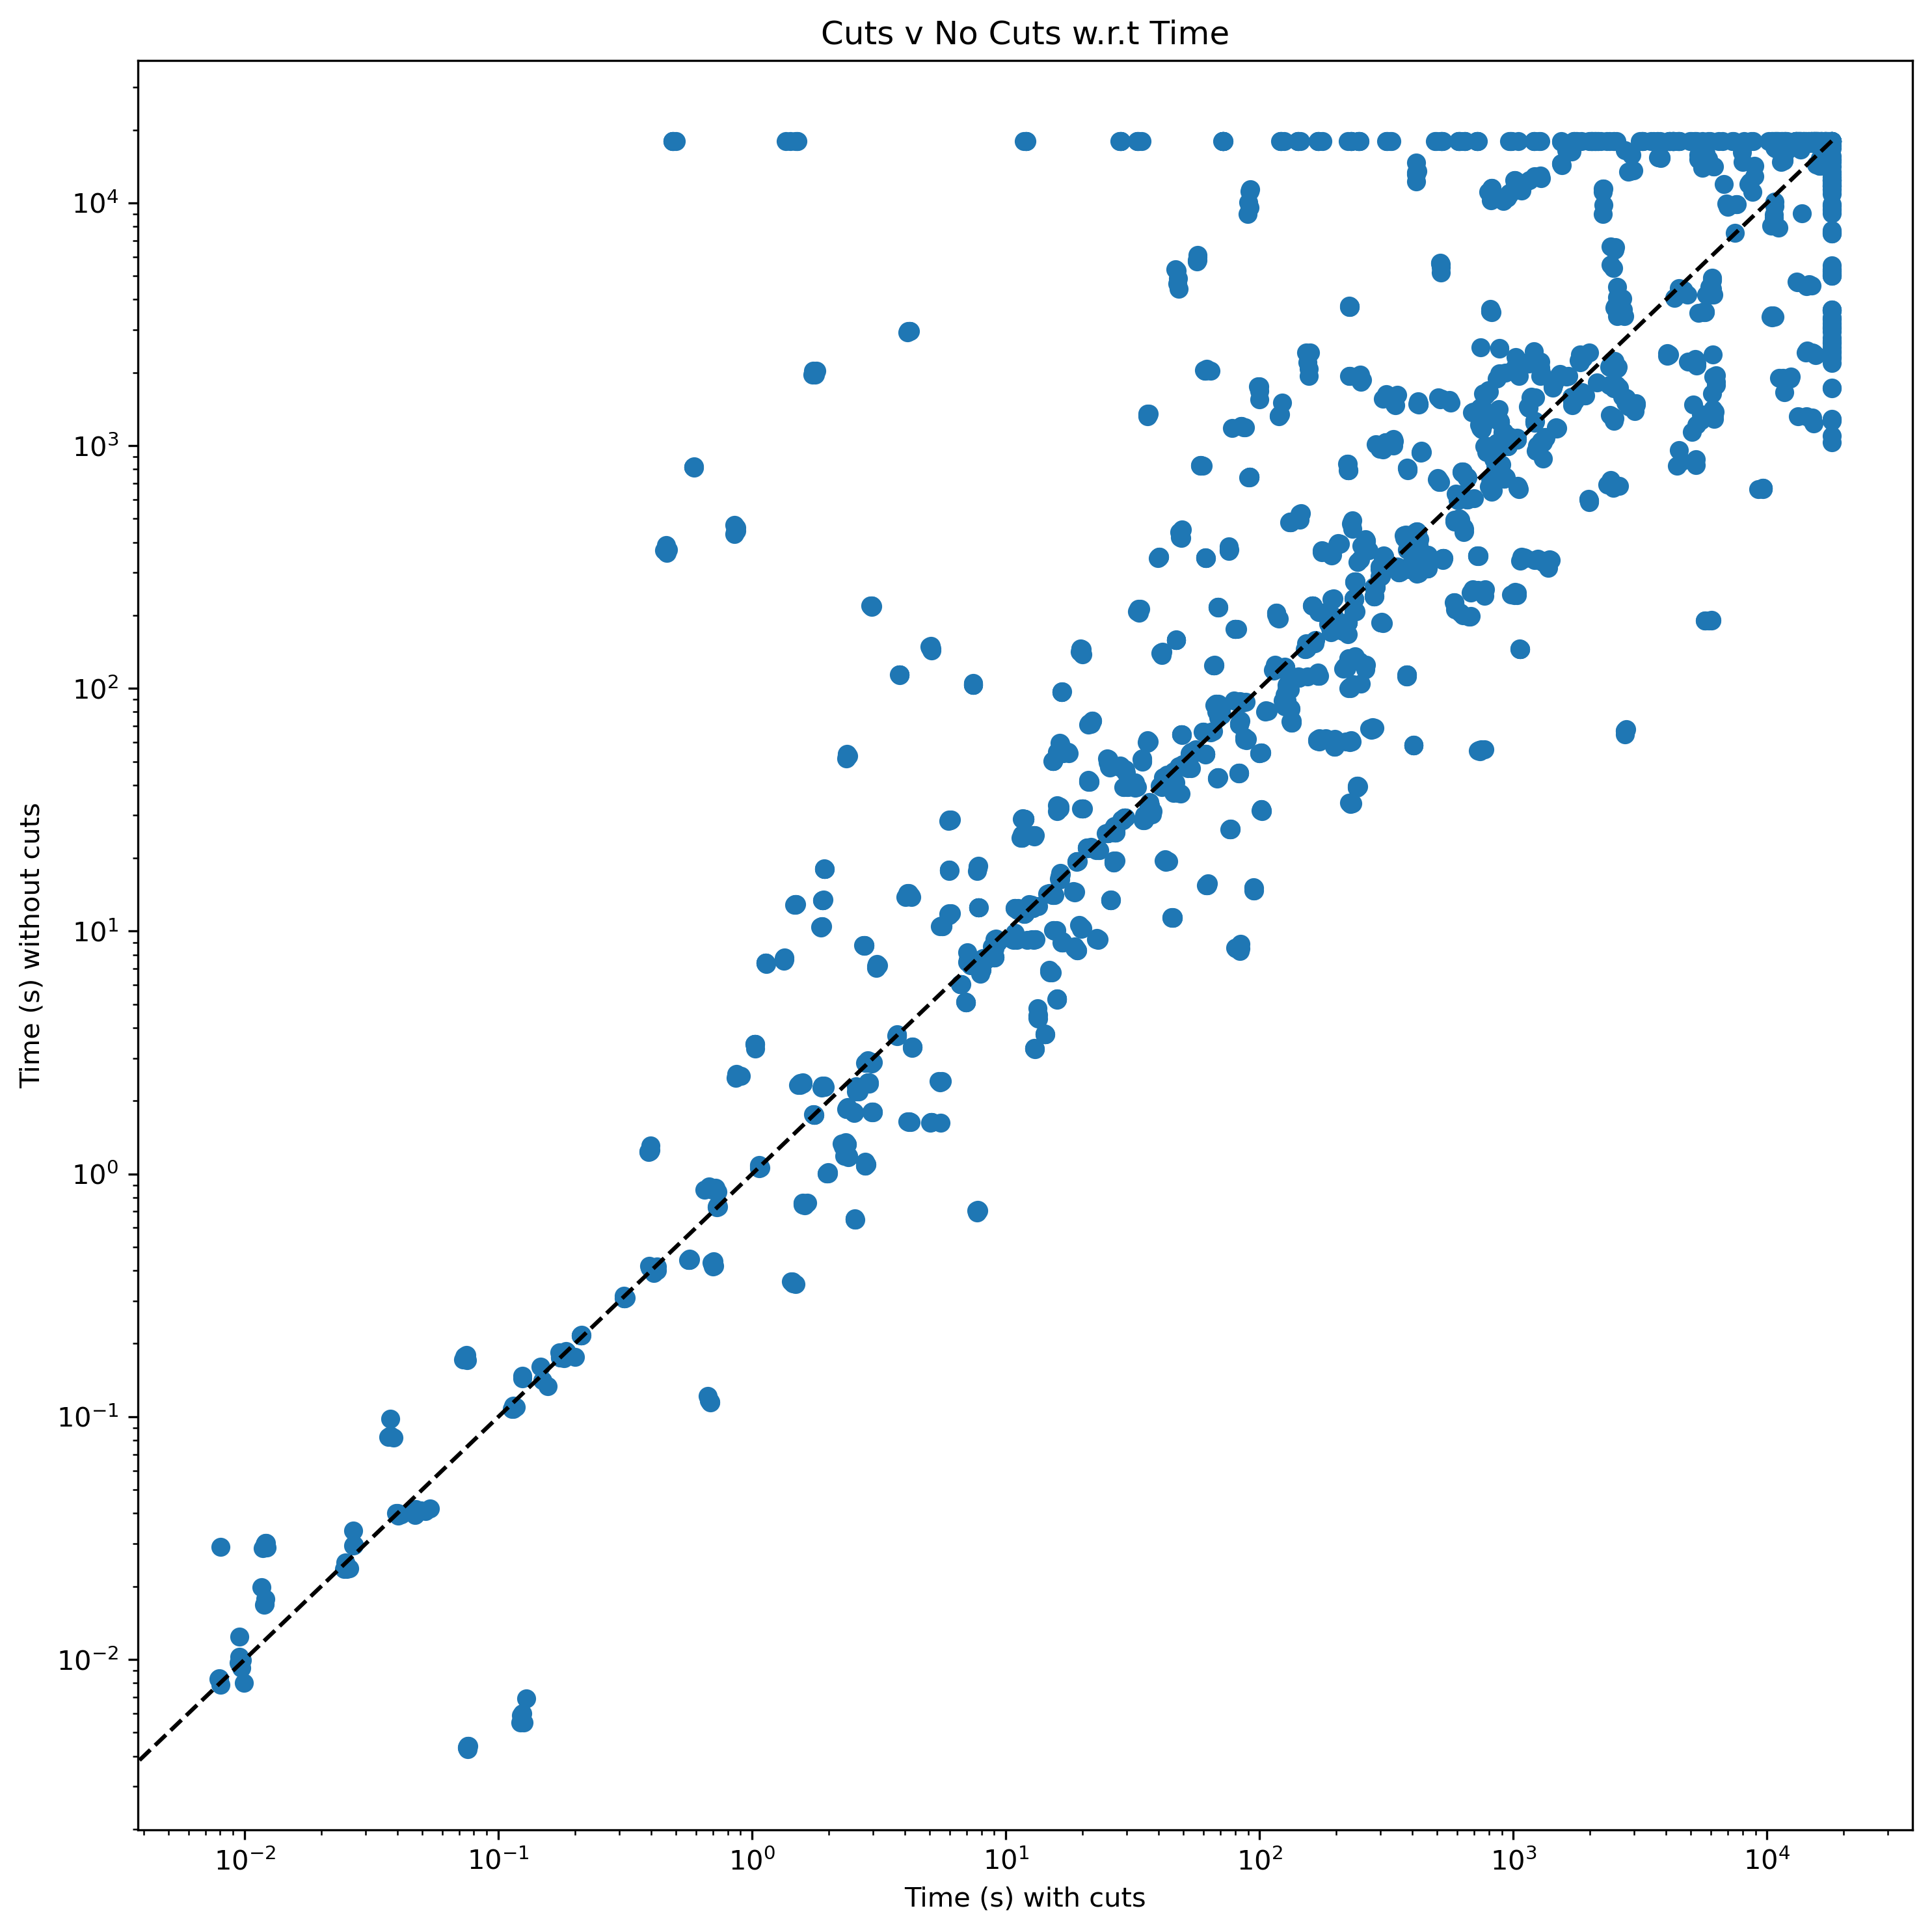

<Figure size 432x288 with 0 Axes>

In [19]:
minx = 0
maxx = 18000

plt.figure(figsize=(10, 10), dpi=300)
plt.scatter(x=analysis_set_3['TIME W/ CUTS'], y=analysis_set_3['TIME W/O CUTS'])
# plt.scatter(x=hard['TIME W/ CUTS'], y=hard['TIME W/O CUTS'])
# plt.legend(["easy" , "hard"], bbox_to_anchor = (1 , 1))

plt.plot(range(int(minx),int(maxx)),range(int(minx),int(maxx)),'--', color='black')

plt.title('Cuts v No Cuts w.r.t Time')
plt.xlabel('Time (s) with cuts')
plt.ylabel('Time (s) without cuts')



fig = plt.gcf()

ax_list=fig.axes
ax=ax_list[0]
ax.set_xscale("log")
ax.set_yscale("log")
plt.tight_layout()
plt.show()
plt.draw()
fname = "plot"
fig.savefig(fname, dpi=300)

In [20]:
df_0 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 0)]
df_10 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 10)]
df_100 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 100)]
df_1000 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 1000)]
df_3600 = analysis_set_3[(analysis_set_3['Minimum Time'] >= 3600)]

In [21]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
n_cuts = []
n_nocuts = []
n_perfect = []
instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    time_shift_perfect = [i + SHIFT_TIME for i in time_perfect]
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(time_shift_perfect) - SHIFT_TIME
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    
    instances.append(len(data))

In [22]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts
avg_bb_df[('Time', 'Perfect')] = t_perfect
avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts
avg_bb_df[('Node', 'Perfect')] = n_perfect


avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       343.445870    517.326676   270.711792   
               [10,18000)      637.969455    953.611882   483.251293   
               [100,18000)    1581.690168   2227.952373  1170.680885   
               [1000,18000)   5765.241156   6863.840991  4103.873453   
               [3600,18000)  11111.216531  13476.412604  9376.142775   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4508.617322   14227.825971   3936.705655   
               [10,18000)     7828.473820   24587.907419   6662.397024   
               [100,18000)   14366.833668   39263.733839  12025.236283   
               [1000,18000)  48172.979592  115685.056639  37929.815249   
               [3600,18000)  68902.582826  163629.436186  55215.984283   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)         2130  
               [10,18000)        1640  
               [100,18000)       1110  
               [1000,18000)       543  
               [3600,18000)       272

ML FOR SET 3

In [23]:
analysis_ml = analysis_set_3 
analysis_ml = analysis_ml.merge(df_nocuts_new, on = ['NAME', 'RANDOM SEED'], how = 'left')
analysis_ml = analysis_ml.drop(['Minimum Time', 'Minimum Nodes', 'FIRST ROUND CUT', 'ROUND OF CUTS', 
                                'OBJECTIVE VALUE ROOT NODE', 'BEST SOLUTION', 'SOLUTION TIME', 'BEST PRIMAL BOUND',
                                'GAP', 'No. OF CUTS GENERATED', 'No. OF CUTS APPLIED', 'No. OF CUTS PRESENT IN LP AT THE END',
                                'CUT SETTING', 'No. OF NODES', 'STATUS', 'END'], axis=1)
analysis_ml

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,GAP W/ CUTS,GAP W/O CUTS,INITIAL LP,PRESOLVING TIME
0,10teams.mps.gz,2,11.088517,30,12.212530,276,0.0,0.0,20.0,0.062201
1,10teams.mps.gz,4,11.186637,30,12.444448,276,0.0,0.0,20.0,0.060087
2,10teams.mps.gz,8,11.044666,30,12.331489,276,0.0,0.0,20.0,0.058780
3,10teams.mps.gz,16,10.835616,30,12.467186,276,0.0,0.0,20.0,0.059116
4,10teams.mps.gz,32,10.833424,30,12.477946,276,0.0,0.0,20.0,0.058801
...,...,...,...,...,...,...,...,...,...,...
2125,wachplan.mps.gz,2,1427.930347,67520,1801.604630,98056,0.0,0.0,-24.0,1.552340
2126,wachplan.mps.gz,4,1444.662760,67520,1804.842432,98056,0.0,0.0,-24.0,1.914422
2127,wachplan.mps.gz,8,1431.659624,67520,1737.152014,98056,0.0,0.0,-24.0,1.507830
2128,wachplan.mps.gz,16,1433.459125,67520,1758.587956,98056,0.0,0.0,-24.0,1.547767


In [24]:
static = pd.read_csv("features_original.csv")
static = static.filter(['instance_name', 'vars', 'bin_vars', 'int_vars', 'cont_vars', 
                       'constr', 'linsetpart_constr', 'linsetpack_constr', 'linsetcov_constr', 'lincard_constr',
                       'lineqknap_constr', 'linbinpack_constr', 'linknaps_constr', 'linintknap_constr',
                        'linmixbin_constr', 'nonzeroes', 'obj_dyn', 'dynamism_mean'], axis = 1)
static['instance_name'] = static.instance_name.str.split('/').str[-1]

static_new = static.loc[static.instance_name.isin(analysis_set_3.NAME)]

static_new['nonzeroes'] = static_new['nonzeroes'] / (static_new['vars'] * static_new['constr'] )

static_new['bin_vars'] = static_new['bin_vars'] / static_new['vars']
static_new['int_vars'] = static_new['int_vars'] / static_new['vars']
static_new['cont_vars'] = static_new['cont_vars'] / static_new['vars']

static_new['linbinpack_constr'] = static_new['linbinpack_constr'] / static_new['constr']
static_new['lincard_constr'] = static_new['lincard_constr'] / static_new['constr']
static_new['lineqknap_constr'] = static_new['lineqknap_constr'] / static_new['constr']
static_new['linintknap_constr'] = static_new['linintknap_constr'] / static_new['constr']
static_new['linknaps_constr'] = static_new['linknaps_constr'] / static_new['constr']
static_new['linmixbin_constr'] = static_new['linmixbin_constr'] / static_new['constr']
static_new['linsetcov_constr'] = static_new['linsetcov_constr'] / static_new['constr']
static_new['linsetpack_constr'] = static_new['linsetpack_constr'] / static_new['constr']
static_new['linsetpart_constr'] = static_new['linsetpart_constr'] / static_new['constr']

static_new['vars'] = np.log(static_new['vars'])
static_new['constr'] = np.log(static_new['constr'])

static_new.rename(columns={'instance_name': 'NAME'}, inplace=True)

static_new

<ipython-input-24-edaf87848c2e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_new['nonzeroes'] = static_new['nonzeroes'] / (static_new['vars'] * static_new['constr'] )
<ipython-input-24-edaf87848c2e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  static_new['bin_vars'] = static_new['bin_vars'] / static_new['vars']
<ipython-input-24-edaf87848c2e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,NAME,vars,bin_vars,int_vars,cont_vars,constr,linsetpart_constr,linsetpack_constr,linsetcov_constr,lincard_constr,lineqknap_constr,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean
27,drayage-25-27.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.946700,4.357370
36,drayage-25-32.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.965990,4.357370
66,drayage-100-12.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.920630,4.357390
67,drayage-25-23.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.884700,4.357380
159,drayage-100-23.mps.gz,9.313799,0.994139,0.0,0.005861,8.440312,0.045356,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.912527,0.000809,1.884700,4.357380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,istanbul-no-cutoff.mps.gz,8.572060,0.005680,0.0,0.994320,9.920640,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000049,0.0,0.992628,0.000665,1.257010,0.255187
5619,30_70_45_095_100.mps.gz,9.303466,0.999909,0.0,0.000091,9.435562,0.000000,0.000000,0.001437,0.0,0.0,0.0,0.000000,0.0,0.164139,0.000339,3.789020,0.000000
5631,eil33-2.mps.gz,8.415382,1.000000,0.0,0.000000,3.465736,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.306155,0.778142,0.000000
5709,map10.mps.gz,12.010952,0.000887,0.0,0.999113,12.703260,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000003,0.0,0.027666,0.000010,0.000000,0.000003


In [25]:
# Presolve Features

presol = pd.read_csv("features_after_trivial_presolving.csv")
presol = presol.filter(['instance_name', 'vars', 'int_vars', 'constr'], axis = 1)

presol['instance_name'] = presol.instance_name.str.split('/').str[-1]

presol_new = presol.loc[presol.instance_name.isin(analysis_set_3.NAME)]

presol_new['int_vars'] = presol_new['int_vars'] / presol_new['vars']

presol_new['vars'] = np.log(presol_new['vars'])
presol_new['constr'] = np.log(presol_new['constr'])

presol_new.rename(columns={'instance_name': 'NAME', 'vars': 'presol_vars', 'int_vars': 'presol_int_vars', 
                            'constr': 'presol_constr'}, inplace=True)

<ipython-input-25-bd3daf2a7fae>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presol_new['int_vars'] = presol_new['int_vars'] / presol_new['vars']
<ipython-input-25-bd3daf2a7fae>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  presol_new['vars'] = np.log(presol_new['vars'])
<ipython-input-25-bd3daf2a7fae>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [26]:
ml_1 = analysis_ml.merge(static_new, on = "NAME", how = "left")
ml_2 = ml_1.merge(presol_new, on = "NAME", how = "left")

In [27]:
time_label = []
nodes_label = []
for index, row in ml_2.iterrows():
    if row['TIME W/ CUTS'] > row['TIME W/O CUTS']:
        time_label.append(-1)
    elif row['TIME W/ CUTS'] <= row['TIME W/O CUTS']:
        time_label.append(1)

    if row['NODES W/ CUTS'] > row['NODES W/O CUTS']:
        nodes_label.append(-1)
    elif row['NODES W/ CUTS'] <= row['NODES W/O CUTS']:
        nodes_label.append(1)
    
ml_2['Time Label'] = time_label
ml_2['Nodes Label'] = nodes_label

ml_2.to_csv('ml.csv')
ml_2

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,GAP W/ CUTS,GAP W/O CUTS,INITIAL LP,PRESOLVING TIME,vars,bin_vars,int_vars,cont_vars,constr,linsetpart_constr,linsetpack_constr,linsetcov_constr,lincard_constr,lineqknap_constr,linbinpack_constr,linknaps_constr,linintknap_constr,linmixbin_constr,nonzeroes,obj_dyn,dynamism_mean,presol_vars,presol_int_vars,presol_constr,Time Label,Nodes Label
0,10teams.mps.gz,2,11.088517,30,12.212530,276,0.0,0.0,20.0,0.062201,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108,1,1
1,10teams.mps.gz,4,11.186637,30,12.444448,276,0.0,0.0,20.0,0.060087,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108,1,1
2,10teams.mps.gz,8,11.044666,30,12.331489,276,0.0,0.0,20.0,0.058780,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108,1,1
3,10teams.mps.gz,16,10.835616,30,12.467186,276,0.0,0.0,20.0,0.059116,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108,1,1
4,10teams.mps.gz,32,10.833424,30,12.477946,276,0.0,0.0,20.0,0.058801,7.613325,0.888889,0.000000,0.111111,5.438079,0.347826,0.173913,0.0,0.000000,0.0,0.0,0.0,0.0,0.478261,0.026087,1.63347,0.0,7.377759,0.000000,5.347108,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,wachplan.mps.gz,2,1427.930347,67520,1801.604630,98056,0.0,0.0,-24.0,1.552340,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025,1,1
2126,wachplan.mps.gz,4,1444.662760,67520,1804.842432,98056,0.0,0.0,-24.0,1.914422,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025,1,1
2127,wachplan.mps.gz,8,1431.659624,67520,1737.152014,98056,0.0,0.0,-24.0,1.507830,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025,1,1
2128,wachplan.mps.gz,16,1433.459125,67520,1758.587956,98056,0.0,0.0,-24.0,1.547767,8.119994,0.999702,0.000298,0.000000,7.347944,0.000000,0.000000,0.0,0.144237,0.0,0.0,0.0,0.0,0.018030,0.017120,0.00000,0.0,7.741534,0.000434,6.582025,1,1


In [28]:
train = ml_2[ml_2['RANDOM SEED'] > 2]
test = ml_2[ml_2['RANDOM SEED'] == 2]
len(train)

1704

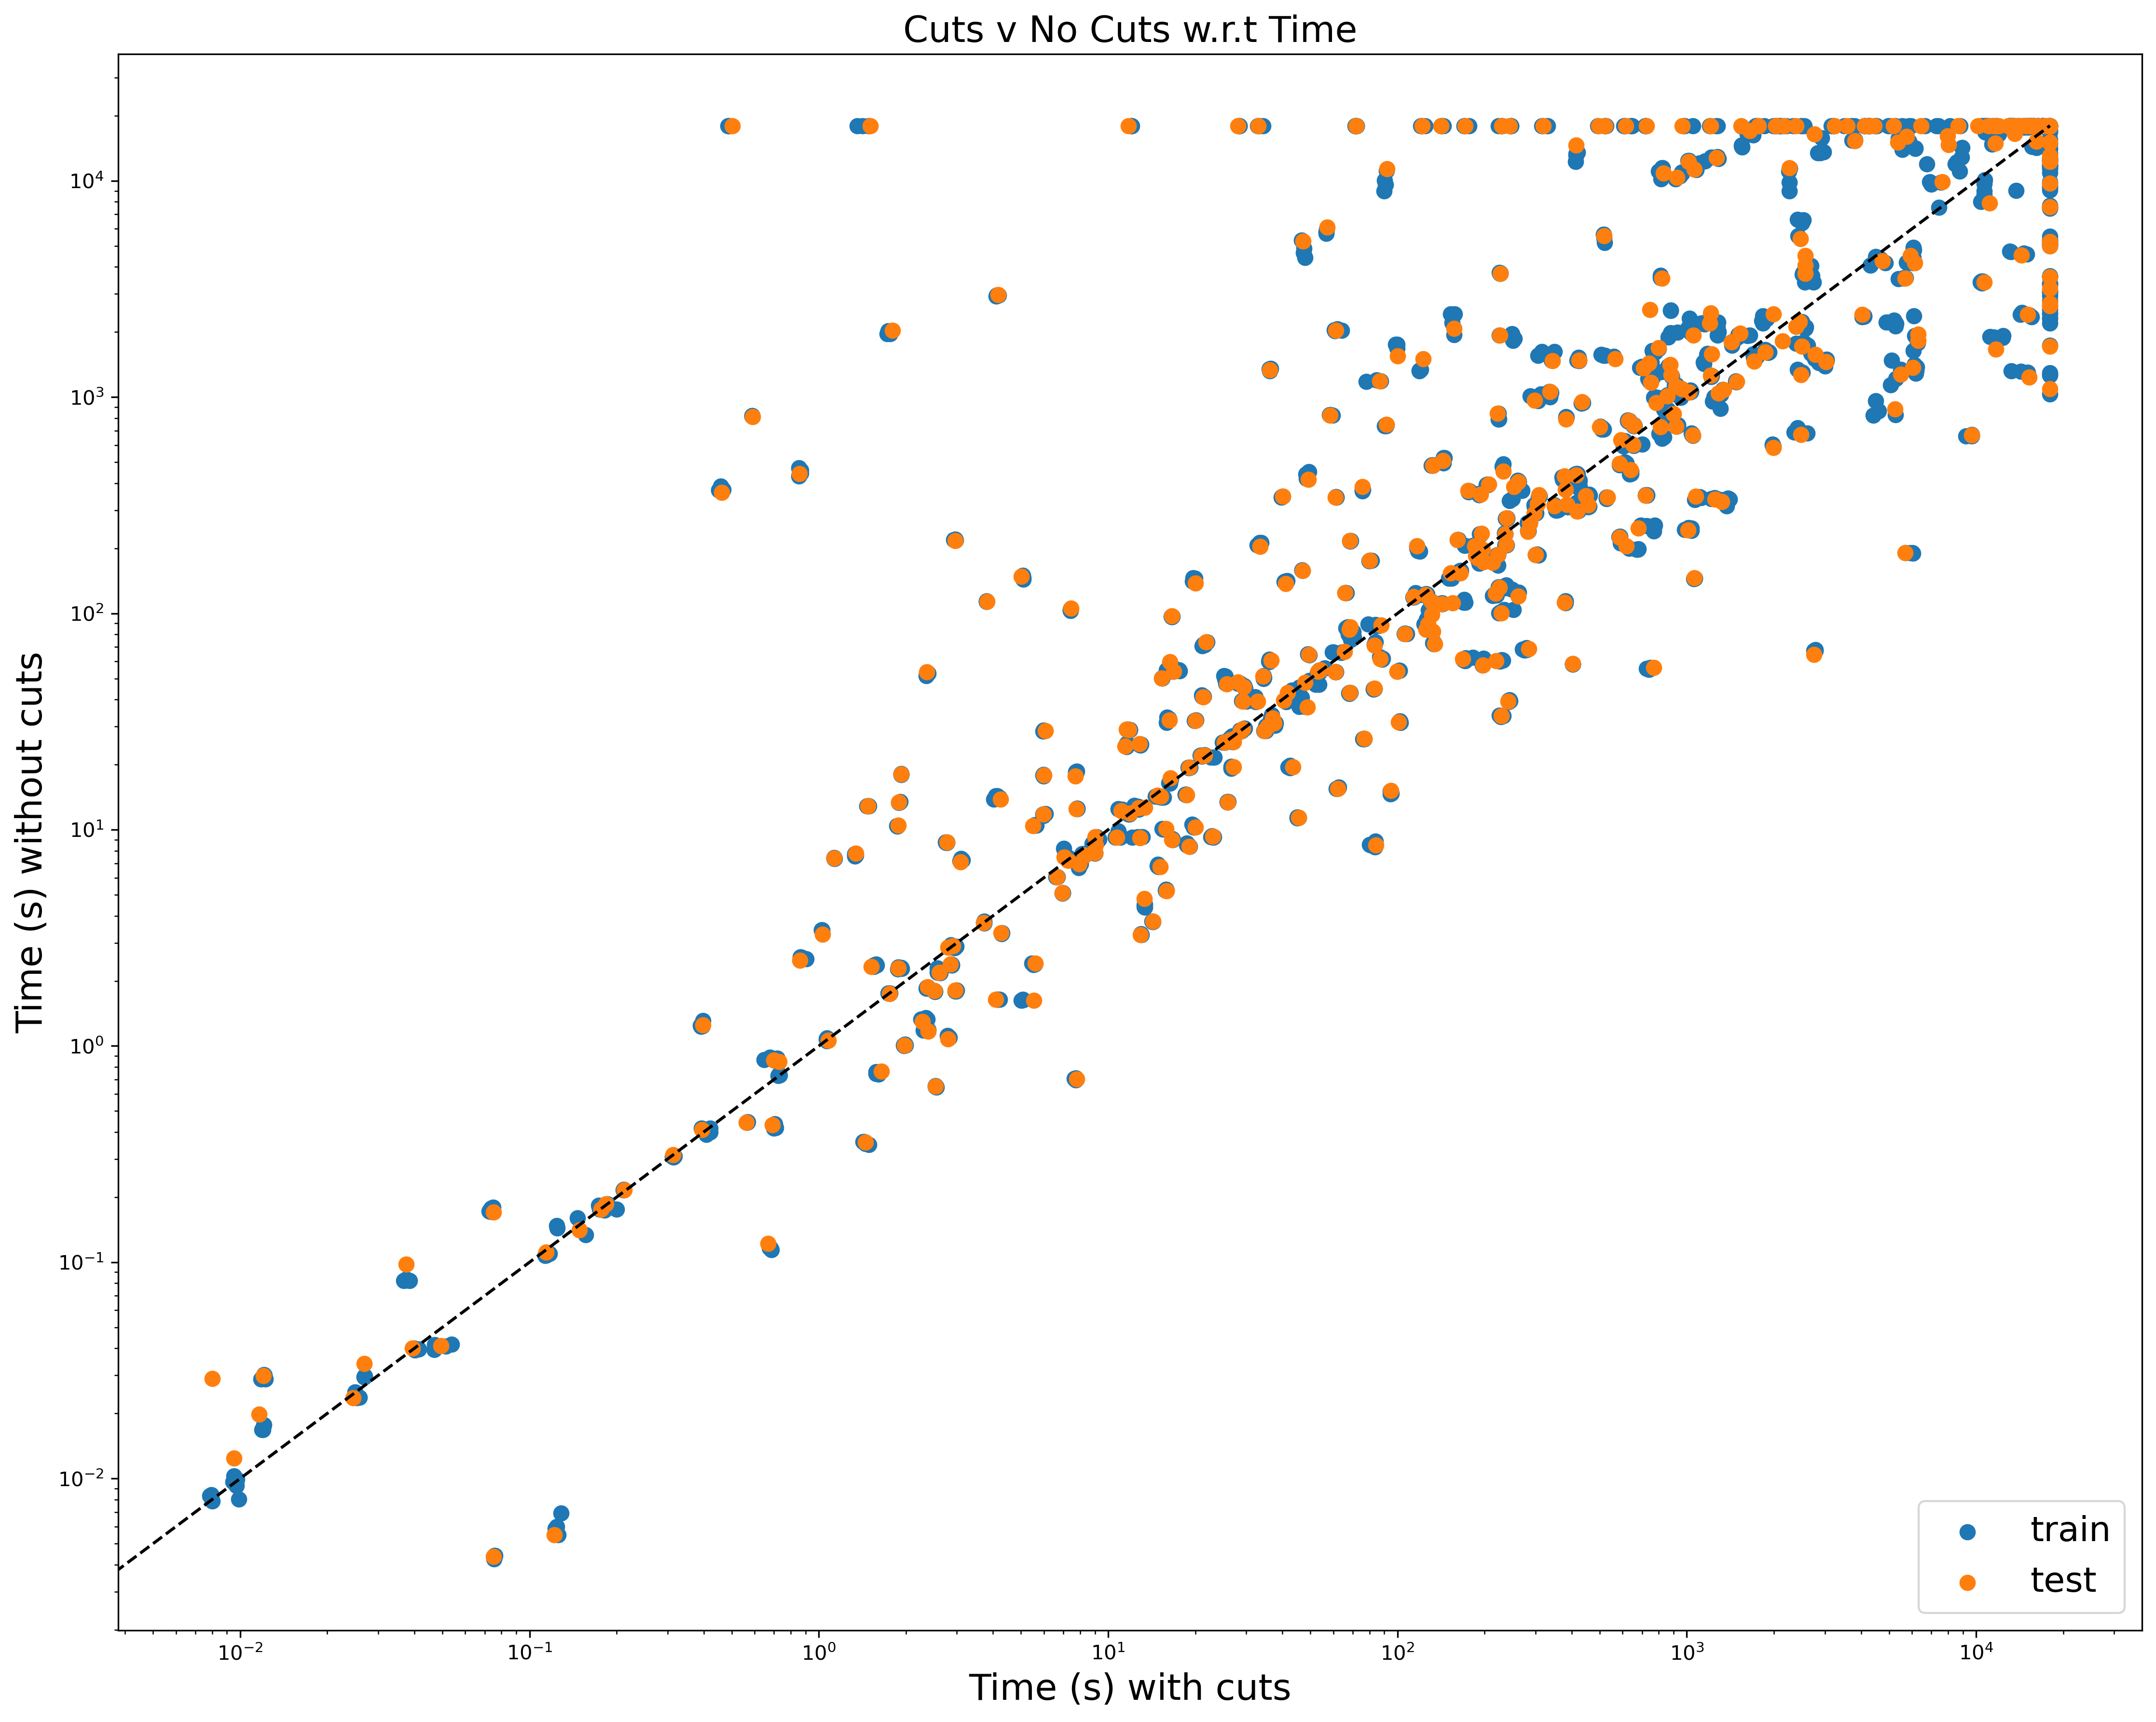

<Figure size 432x288 with 0 Axes>

In [29]:
minx = 0
maxx = 18000

plt.figure(figsize=(15,12), dpi=300)
plt.scatter(x=train['TIME W/ CUTS'], y=train['TIME W/O CUTS'], s=50)
plt.scatter(x=test['TIME W/ CUTS'], y=test['TIME W/O CUTS'], s=50)
plt.legend(["train" , "test"], loc='lower right', fontsize="xx-large")

plt.plot(range(int(minx),int(maxx)),range(int(minx),int(maxx)),'--', color='black')

plt.title('Cuts v No Cuts w.r.t Time', fontsize=18)
plt.xlabel('Time (s) with cuts', fontsize=18)
plt.ylabel('Time (s) without cuts', fontsize=18)



fig = plt.gcf()

ax_list=fig.axes
ax=ax_list[0]
ax.set_xscale("log")
ax.set_yscale("log")
plt.tight_layout()
plt.show()
plt.draw()
fname = "set3"
fig.savefig(fname, dpi=300)

In [30]:
train_feat = train.drop(['RANDOM SEED', 'TIME W/ CUTS', 'NODES W/ CUTS', 
                    'TIME W/O CUTS', 'NODES W/O CUTS'], axis=1)
test_feat = test.drop(['RANDOM SEED', 'TIME W/ CUTS', 'NODES W/ CUTS', 
                  'TIME W/O CUTS', 'NODES W/O CUTS'], axis=1)

In [31]:
# Import ML Libraries
from collections import OrderedDict
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_X_y

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.dummy import DummyClassifier

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [32]:
X_train = train_feat.drop(['NAME', 'Time Label', 'Nodes Label'], axis=1)
X_train = X_train.astype(np.float64)

y_train = train_feat.filter(['Time Label'])
y_train = y_train.astype(np.float64)

X_test = test_feat.drop(['NAME', 'Time Label', 'Nodes Label'], axis=1)
X_test = X_test.astype(np.float64)

y_test = test_feat.filter(['Time Label'])
y_test = y_test.astype(np.float64)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1704, 24) (1704, 1)
(426, 24) (426, 1)


In [33]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
# Feature Selection
cols = train_feat.drop(['NAME', 'Time Label', 'Nodes Label'], axis=1)

bestfeatures = SelectKBest(score_func=f_classif, k = 'all')
fit = bestfeatures.fit(X_train,y_train)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(cols.columns)
featureScores = pd.concat([columns,scores],axis=1)
featureScores
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(22,'Score')) #print best features
data=featureScores.nlargest(22,'Score')

             Features      Score
18          nonzeroes  20.519396
0         GAP W/ CUTS  19.748979
19            obj_dyn  16.282950
1        GAP W/O CUTS  13.436773
12     lincard_constr  12.570489
20      dynamism_mean  10.460717
3     PRESOLVING TIME   6.677581
2          INITIAL LP   4.891050
17   linmixbin_constr   3.731441
14  linbinpack_constr   2.888891
9   linsetpart_constr   2.867045
5            bin_vars   1.756245
21        presol_vars   1.736406
10  linsetpack_constr   1.505543
4                vars   1.459435
7           cont_vars   1.311371
6            int_vars   1.084470
16  linintknap_constr   0.288878
11   linsetcov_constr   0.174119
22    presol_int_vars   0.089224
15    linknaps_constr   0.017675
8              constr   0.001280


C:\Users\ambar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


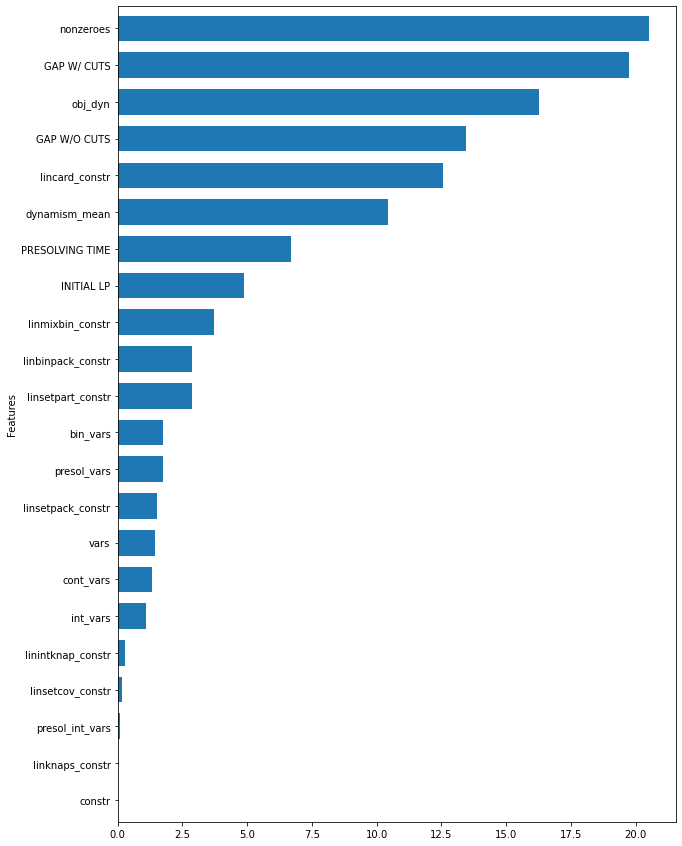

In [35]:
features = data.copy().set_index('Features') 
features = features.iloc[::-1]
features.plot.barh(width = 0.7, figsize=(10,15), legend=None)
fname = "features"
plt.savefig(fname, dpi=300)

In [36]:
X_train = train_feat.drop(['NAME', 'Time Label', 'Nodes Label', 'linintknap_constr', 'linsetcov_constr', 'presol_int_vars',
                           'linknaps_constr', 'constr', 'lineqknap_constr', 'presol_constr'], axis=1)

y_train = train_feat.filter(['Time Label'])

X_test = test_feat.drop(['NAME', 'Time Label', 'Nodes Label', 'linintknap_constr', 'linsetcov_constr', 'presol_int_vars',
                           'linknaps_constr', 'constr', 'lineqknap_constr', 'presol_constr'], axis=1)

y_test = test_feat.filter(['Time Label'])

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1704, 17) (1704, 1)
(426, 17) (426, 1)


In [37]:
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
model_params={'svm':{'model': SVC(kernel = 'rbf', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 'gamma': [1e-2, 1e-3, 1e-4]
                             }
                    },
              'rfm':{'model': RandomForestClassifier(random_state = 0), 
                    'params':{'n_estimators':[100, 200, 500], 
                             'max_depth':[5, 10, 15]
                             }
                    },
              'lrm':{'model': LogisticRegression(solver='lbfgs', random_state = 0), 
                    'params':{'C':[10, 100, 1000], 
                              'max_iter':[100, 500, 1000]
                             }
                    },
              'et':{'model': ExtraTreesClassifier(random_state=0), 
                    'params':{'n_estimators': [100, 200, 500], 
                              'max_depth': [5, 10, 15]
                             }
                    },
              'nn':{'model': MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', 
                                           power_t=0.5, max_iter=500, shuffle=True, tol=0.00001, verbose=True, 
                                           early_stopping=False, validation_fraction=0.1, random_state=0),
                    'params':{'hidden_layer_sizes': [(5, ), (10, ), (15, )],
                                 'learning_rate_init': [1e-1, 1e-2, 1e-3],
                                 'alpha':  [1e-2, 1e-3, 1e-4],
                                 'activation': ['tanh', 'relu', 'logistic']
                             }
                    }
             }
scores=[]
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp['model'], mp['params'], cv = None, return_train_score = False, n_jobs = -1)
    clf.fit(X_train, y_train)
    scores.append({'model': model_name, 'best_score':clf.best_score_, 'best_params':clf.best_params_})

C:\Users\ambar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ambar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\ambar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ambar\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

In [38]:
scores=pd.DataFrame(scores).sort_values(by = ['best_score'], ascending = False)
scores.to_csv('scores.csv')

KeyError: 'best_score'

In [39]:
scores = OrderedDict()
target_names = ['-1', '1']

print('SUPPORT VECTOR MACHINES')
clf = SVC(random_state = 0, C = 10, gamma = 0.001, kernel = 'rbf')
clf.fit(X_train, y_train)
y_train_pred_svm = clf.predict(X_train)
y_test_pred_svm = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_svm)
mse_test = mean_squared_error(y_test, y_test_pred_svm)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_svm, target_names=target_names))
scores['SVC'] = [score, metrics.precision_score(y_test, y_test_pred_svm), metrics.recall_score(y_test, y_test_pred_svm),
                      metrics.f1_score(y_test, y_test_pred_svm), mse_test, mse_train]

print('##################################')
print('NEURAL NETWORKS')
clf = MLPClassifier(solver='lbfgs', batch_size='auto', learning_rate='constant', power_t=0.5, max_iter=500, 
                    shuffle=True, tol=0.00001, verbose=True, 
                    early_stopping=False, validation_fraction=0.1,
                    hidden_layer_sizes=(10, ), activation='logistic', alpha=0.001, 
                    learning_rate_init=0.1, random_state=0)
clf.fit(X_train, y_train)
y_train_pred_nn = clf.predict(X_train)
y_test_pred_nn = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_nn)
mse_test = mean_squared_error(y_test, y_test_pred_nn)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_nn, target_names=target_names))
scores['NN'] = [score, metrics.precision_score(y_test, y_test_pred_nn), metrics.recall_score(y_test, y_test_pred_nn),
                      metrics.f1_score(y_test, y_test_pred_nn), mse_test, mse_train]

print('##################################')
print('DECISION TREES')
clf = ExtraTreesClassifier(random_state=0, max_depth = 5, n_estimators = 100)
clf.fit(X_train, y_train)
y_train_pred_et = clf.predict(X_train)
y_test_pred_et = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_et)
mse_test = mean_squared_error(y_test, y_test_pred_et)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_et, target_names=target_names))
scores['ET'] = [score, metrics.precision_score(y_test, y_test_pred_et), 
                         metrics.recall_score(y_test, y_test_pred_et), 
                         metrics.f1_score(y_test, y_test_pred_et), mse_test, mse_train]

print('##################################')
print('LOGISTIC REGRESSION')
clf = LogisticRegression(solver='lbfgs', random_state = 0, C = 100, max_iter = 100)
clf.fit(X_train, y_train)
y_train_pred_lr = clf.predict(X_train)
y_test_pred_lr = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_lr)
mse_test = mean_squared_error(y_test, y_test_pred_lr)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_lr, target_names=target_names))
scores['LR'] = [score, metrics.precision_score(y_test, y_test_pred_lr), metrics.recall_score(y_test, y_test_pred_lr),
                      metrics.f1_score(y_test, y_test_pred_lr), mse_test, mse_train]

print('##################################')
print('RANDOM FOREST')
clf = RandomForestClassifier(random_state = 0, max_depth = 10, n_estimators = 100)
clf.fit(X_train, y_train)
y_train_pred_rf = clf.predict(X_train)
y_test_pred_rf = clf.predict(X_test)
score = clf.score(X_test, y_test)
mse_train = mean_squared_error(y_train, y_train_pred_rf)
mse_test = mean_squared_error(y_test, y_test_pred_rf)
print('MSE Test: {}, MSE Train: {}' .format(mse_test, mse_train))
print("Accuracy score: {}\n".format(score))
print(classification_report(y_test, y_test_pred_rf, target_names=target_names))
scores['RF'] = [score, metrics.precision_score(y_test, y_test_pred_rf), metrics.recall_score(y_test, y_test_pred_rf),
                      metrics.f1_score(y_test, y_test_pred_rf), mse_test, mse_train]

SUPPORT VECTOR MACHINES
MSE Test: 1.568075117370892, MSE Train: 1.6126760563380282
Accuracy score: 0.607981220657277



C:\Users\ambar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

          -1       0.86      0.13      0.23       188
           1       0.59      0.98      0.74       238

    accuracy                           0.61       426
   macro avg       0.73      0.56      0.48       426
weighted avg       0.71      0.61      0.51       426

##################################
NEURAL NETWORKS


C:\Users\ambar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ambar\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
<ipython-input-39-8d8502df3351>:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\ambar\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y w

MSE Test: 0.5164319248826291, MSE Train: 0.4647887323943662
Accuracy score: 0.8708920187793427

              precision    recall  f1-score   support

          -1       0.88      0.82      0.85       188
           1       0.86      0.91      0.89       238

    accuracy                           0.87       426
   macro avg       0.87      0.87      0.87       426
weighted avg       0.87      0.87      0.87       426

##################################
DECISION TREES
MSE Test: 1.4366197183098592, MSE Train: 1.4671361502347418
Accuracy score: 0.6408450704225352

              precision    recall  f1-score   support

          -1       0.95      0.20      0.33       188
           1       0.61      0.99      0.76       238

    accuracy                           0.64       426
   macro avg       0.78      0.59      0.54       426
weighted avg       0.76      0.64      0.57       426

##################################
LOGISTIC REGRESSION
MSE Test: 1.5211267605633803, MSE Train: 1.575117

<ipython-input-39-8d8502df3351>:71: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


MSE Test: 0.14084507042253522, MSE Train: 0.07276995305164319
Accuracy score: 0.9647887323943662

              precision    recall  f1-score   support

          -1       0.95      0.97      0.96       188
           1       0.97      0.96      0.97       238

    accuracy                           0.96       426
   macro avg       0.96      0.97      0.96       426
weighted avg       0.96      0.96      0.96       426



In [40]:
scores_df = pd.DataFrame.from_dict(scores, orient='index')
scores_df.columns=['accuracy', 'precision', 'recall', 'f1-score', 'mse test', 'mse train']
scores_df

,accuracy,precision,recall,f1-score,mse test,mse train
SVC,0.607981,0.589421,0.983193,0.737008,1.568075,1.612676
NN,0.870892,0.864542,0.911765,0.887526,0.516432,0.464789
ET,0.640845,0.609819,0.991597,0.755200,1.436620,1.467136
LR,0.619718,0.618750,0.831933,0.709677,1.521127,1.575117
RF,0.964789,0.974468,0.962185,0.968288,0.140845,0.072770


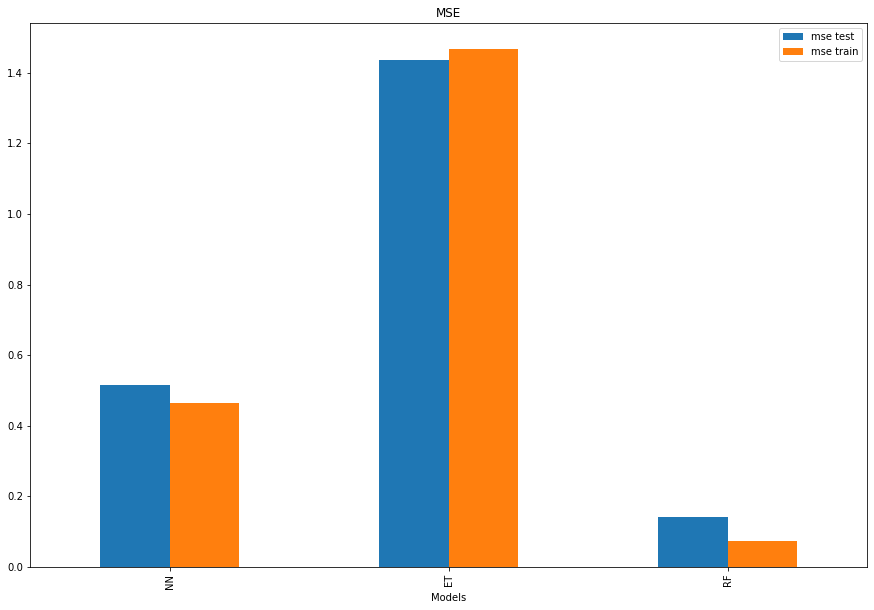

In [41]:
new_scores = scores_df.drop(index=['SVC','LR'])
errors_df = new_scores.filter(['mse test', 'mse train'])
errors_df.plot.bar(width = 0.5, figsize=(15,10))
plt.xlabel("Models")
plt.title('MSE')
fname = "mse_final"
plt.savefig(fname, dpi=300)


Text(0.5, 1.0, 'MSE')

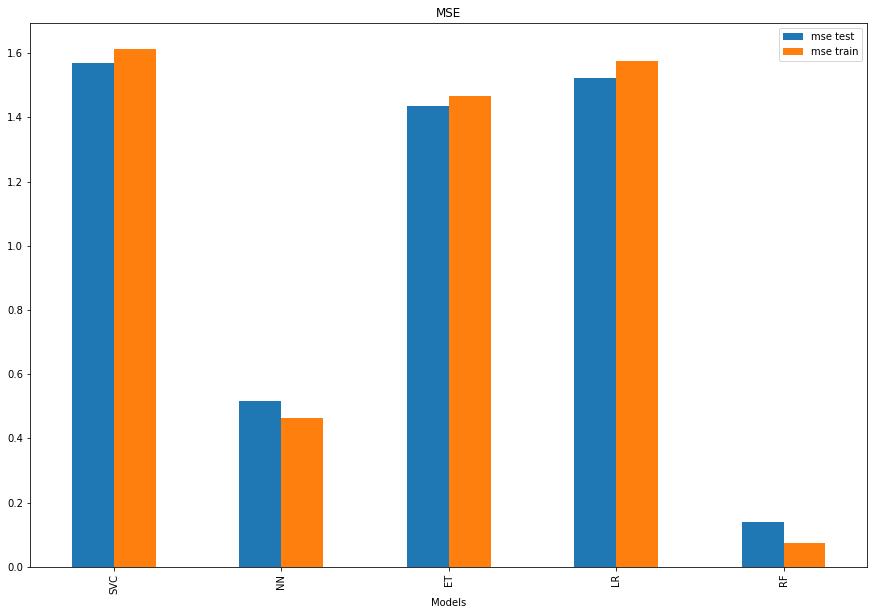

In [42]:
errors_df = scores_df.filter(['mse test', 'mse train'])
errors_df.plot.bar(width = 0.5, figsize=(15,10))
plt.xlabel("Models")
plt.title('MSE')

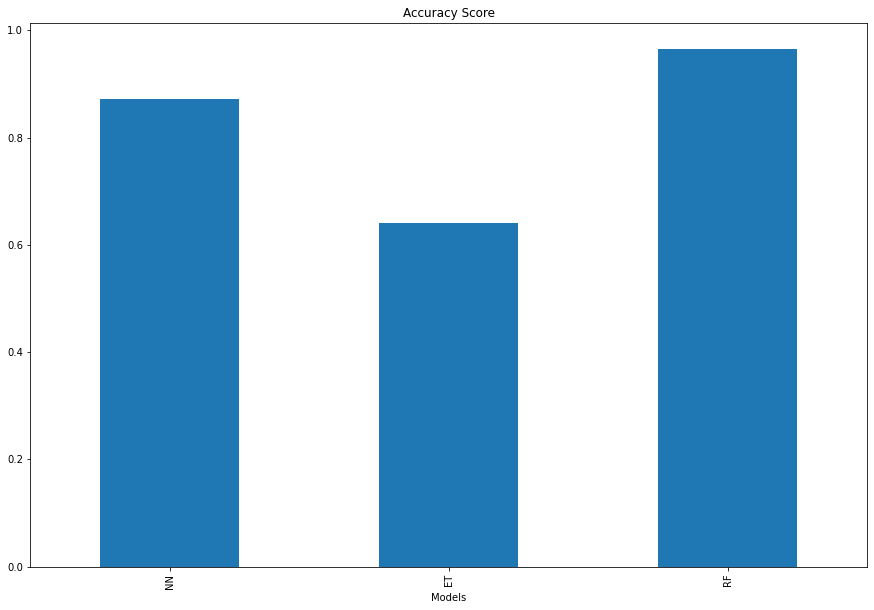

In [43]:
accuracy_df = new_scores.filter(['accuracy'])
accuracy_df.plot.bar(width = 0.5, figsize=(15,10), legend = None)
plt.xlabel("Models")
plt.title('Accuracy Score')
fname = "accuracy_final"
plt.savefig(fname, dpi=300)


Text(0.5, 1.0, 'Accuracy Score')

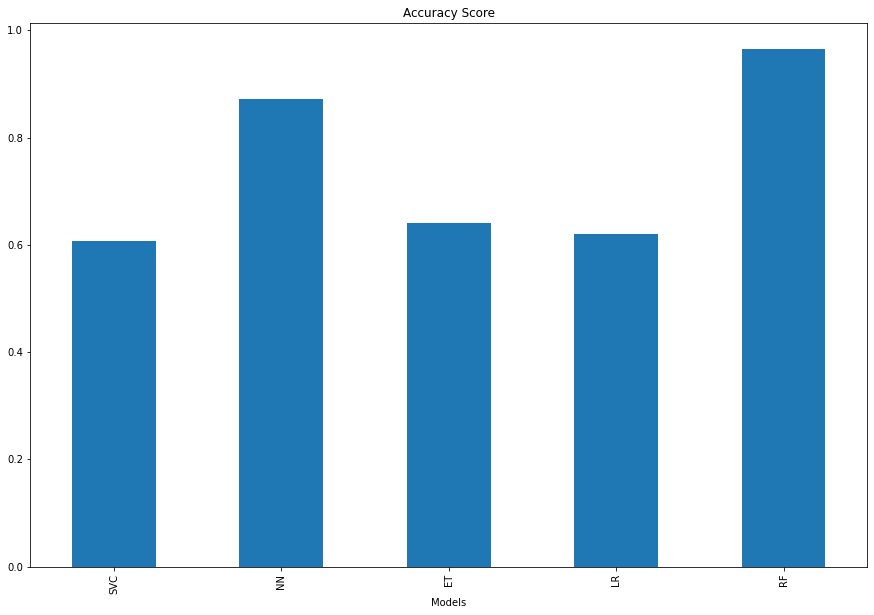

In [44]:
accuracy_df = scores_df.filter(['accuracy'])
accuracy_df.plot.bar(width = 0.5, figsize=(15,10), legend = None)
plt.xlabel("Models")
plt.title('Accuracy Score')

In [45]:
# Predicted Labels

pred = test_feat.copy()
pred['PLabel NN'] = y_test_pred_nn
pred['PLabel ET'] = y_test_pred_et
pred['PLabel RF'] = y_test_pred_rf
ml_3 = analysis_set_3.merge(pred, on = "NAME", how = "left")
ml_3 = ml_3.filter(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS',
                   'NODES W/ CUTS', 'NODES W/O CUTS', 'Minimum Time', 
                    'Minimum Nodes', 'PLabel NN', 'PLabel ET', 'PLabel RF'])
ml_3

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,Minimum Time,Minimum Nodes,PLabel NN,PLabel ET,PLabel RF
0,10teams.mps.gz,2,11.088517,12.212530,30,276,11.088517,30,1,1,1
1,10teams.mps.gz,4,11.186637,12.444448,30,276,11.186637,30,1,1,1
2,10teams.mps.gz,8,11.044666,12.331489,30,276,11.044666,30,1,1,1
3,10teams.mps.gz,16,10.835616,12.467186,30,276,10.835616,30,1,1,1
4,10teams.mps.gz,32,10.833424,12.477946,30,276,10.833424,30,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2125,wachplan.mps.gz,2,1427.930347,1801.604630,67520,98056,1427.930347,67520,1,1,1
2126,wachplan.mps.gz,4,1444.662760,1804.842432,67520,98056,1444.662760,67520,1,1,1
2127,wachplan.mps.gz,8,1431.659624,1737.152014,67520,98056,1431.659624,67520,1,1,1
2128,wachplan.mps.gz,16,1433.459125,1758.587956,67520,98056,1433.459125,67520,1,1,1


In [46]:
# Predicted Time and Nodes

rf_pred_time = []
rf_pred_nodes = []        
for index, row in ml_3.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == -1.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

nn_pred_time = []
nn_pred_nodes = []        
for index, row in ml_3.iterrows():
    if row['PLabel NN'] == 1.0:
        nn_pred_time.append(row['TIME W/ CUTS'])
        nn_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel NN'] == -1.0:
        nn_pred_time.append(row['TIME W/O CUTS'])
        nn_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in ml_3.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == -1.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
ml_3['PTime RF'] = rf_pred_time
ml_3['PTime NN'] = nn_pred_time
ml_3['PTime ET'] = et_pred_time

ml_3['PNodes RF'] = rf_pred_nodes
ml_3['PNodes NN'] = nn_pred_nodes
ml_3['PNodes ET'] = et_pred_nodes

ml_3

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,Minimum Time,Minimum Nodes,PLabel NN,PLabel ET,PLabel RF,PTime RF,PTime NN,PTime ET,PNodes RF,PNodes NN,PNodes ET
0,10teams.mps.gz,2,11.088517,12.212530,30,276,11.088517,30,1,1,1,11.088517,11.088517,11.088517,30,30,30
1,10teams.mps.gz,4,11.186637,12.444448,30,276,11.186637,30,1,1,1,11.186637,11.186637,11.186637,30,30,30
2,10teams.mps.gz,8,11.044666,12.331489,30,276,11.044666,30,1,1,1,11.044666,11.044666,11.044666,30,30,30
3,10teams.mps.gz,16,10.835616,12.467186,30,276,10.835616,30,1,1,1,10.835616,10.835616,10.835616,30,30,30
4,10teams.mps.gz,32,10.833424,12.477946,30,276,10.833424,30,1,1,1,10.833424,10.833424,10.833424,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,wachplan.mps.gz,2,1427.930347,1801.604630,67520,98056,1427.930347,67520,1,1,1,1427.930347,1427.930347,1427.930347,67520,67520,67520
2126,wachplan.mps.gz,4,1444.662760,1804.842432,67520,98056,1444.662760,67520,1,1,1,1444.662760,1444.662760,1444.662760,67520,67520,67520
2127,wachplan.mps.gz,8,1431.659624,1737.152014,67520,98056,1431.659624,67520,1,1,1,1431.659624,1431.659624,1431.659624,67520,67520,67520
2128,wachplan.mps.gz,16,1433.459125,1758.587956,67520,98056,1433.459125,67520,1,1,1,1433.459125,1433.459125,1433.459125,67520,67520,67520


In [47]:
avg_bb_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut','No Cut', 'Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

bb_row_names = pd.MultiIndex.from_product(
    [bb_classes, bb_buckets],
    names=['Metric', 'Bucket'])

avg_bb_df = pd.DataFrame(
    index = bb_row_names,
    dtype = float)

avg_bb_df = pd.DataFrame(
    columns = avg_bb_cols,
    index = bb_row_names,
    dtype = float)

In [48]:
df_0 = ml_3[(ml_3['Minimum Time'] >= 0)]
df_10 = ml_3[(ml_3['Minimum Time'] >= 10)]
df_100 = ml_3[(ml_3['Minimum Time'] >= 100)]
df_1000 = ml_3[(ml_3['Minimum Time'] >= 1000)]
df_3600 = ml_3[(ml_3['Minimum Time'] >= 3600)]

In [49]:
df = [df_0, df_10, df_100, df_1000, df_3600]
t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [50]:
avg_bb_df['Instances'] = instances

avg_bb_df[('Time', 'Cut')] = t_cuts
avg_bb_df[('Time', 'No Cut')] = t_nocuts

avg_bb_df[('Time', 'RF')] = t_rf
avg_bb_df[('Time', 'ET')] = t_et
avg_bb_df[('Time', 'NN')] = t_nn

avg_bb_df[('Time', 'Perfect')] = t_perfect

avg_bb_df[('Node', 'Cut')] = n_cuts
avg_bb_df[('Node', 'No Cut')] = n_nocuts

avg_bb_df[('Node', 'RF')] = n_rf
avg_bb_df[('Node', 'ET')] = n_et
avg_bb_df[('Node', 'NN')] = n_nn

avg_bb_df[('Node', 'Perfect')] = n_perfect

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       343.445870    517.326676   270.711792   
               [10,18000)      637.969455    953.611882   483.251293   
               [100,18000)    1581.690168   2227.952373  1170.680885   
               [1000,18000)   5765.241156   6863.840991  4103.873453   
               [3600,18000)  11111.216531  13476.412604  9376.142775   

Parameter                                                            \
Setting                               RF            ET           NN   
Metric         Bucket                                                 
Geometric Mean [0,18000)      271.830812    324.516314   284.049457   
               [10,18000)     485.635142    596.251584   511.385497   
               [100,18000)   1178.550461   1456.093293  1252.461466   
               [1000,18000)  4147.801755   5120.552422  4333.080172   
               [3600,18000)  9575.921286  10612.943071  9889.322153   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4508.617322   14227.825971   3936.705655   
               [10,18000)     7828.473820   24587.907419   6662.397024   
               [100,18000)   14366.833668   39263.733839  12025.236283   
               [1000,18000)  48172.979592  115685.056639  37929.815249   
               [3600,18000)  68902.582826  163629.436186  55215.984283   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4566.070801   4463.501988   4669.680597   
               [10,18000)     7854.875517   7724.887837   8093.251879   
               [100,18000)   14827.063516  14166.701779  15446.309988   
               [1000,18000)  49547.864629  46227.389904  51385.357208   
               [3600,18000)  84409.396449  67915.912408  90590.755728   

Parameter                   Instances  
Setting                                
Metric         Bucket                  
Geometric Mean [0,18000)         2130  
               [10,18000)        1640  
               [100,18000)       1110  
               [1000,18000)       543  
               [3600,18000)       272

In [51]:
best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_nn)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_nn)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [52]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

# imp_time    
# imp_nodes

In [53]:
avg_bb_df[('Improvement (%)', 'Time')] = imp_time
avg_bb_df[('Improvement (%)', 'Nodes')] = imp_nodes

avg_bb_df

Parameter                            Time                             \
Setting                               Cut        No Cut      Perfect   
Metric         Bucket                                                  
Geometric Mean [0,18000)       343.445870    517.326676   270.711792   
               [10,18000)      637.969455    953.611882   483.251293   
               [100,18000)    1581.690168   2227.952373  1170.680885   
               [1000,18000)   5765.241156   6863.840991  4103.873453   
               [3600,18000)  11111.216531  13476.412604  9376.142775   

Parameter                                                            \
Setting                               RF            ET           NN   
Metric         Bucket                                                 
Geometric Mean [0,18000)      271.830812    324.516314   284.049457   
               [10,18000)     485.635142    596.251584   511.385497   
               [100,18000)   1178.550461   1456.093293  1252.461466   
               [1000,18000)  4147.801755   5120.552422  4333.080172   
               [3600,18000)  9575.921286  10612.943071  9889.322153   

Parameter                            Node                               \
Setting                               Cut         No Cut       Perfect   
Metric         Bucket                                                    
Geometric Mean [0,18000)      4508.617322   14227.825971   3936.705655   
               [10,18000)     7828.473820   24587.907419   6662.397024   
               [100,18000)   14366.833668   39263.733839  12025.236283   
               [1000,18000)  48172.979592  115685.056639  37929.815249   
               [3600,18000)  68902.582826  163629.436186  55215.984283   

Parameter                                                              \
Setting                                RF            ET            NN   
Metric         Bucket                                                   
Geometric Mean [0,18000)      4566.070801   4463.501988   4669.680597   
               [10,18000)     7854.875517   7724.887837   8093.251879   
               [100,18000)   14827.063516  14166.701779  15446.309988   
               [1000,18000)  49547.864629  46227.389904  51385.357208   
               [3600,18000)  84409.396449  67915.912408  90590.755728   

Parameter                   Instances Improvement (%)            
Setting                                          Time     Nodes  
Metric         Bucket                                            
Geometric Mean [0,18000)         2130      -20.851920 -1.000647  
               [10,18000)        1640      -23.877995 -1.323195  
               [100,18000)       1110      -25.487906 -1.393013  
               [1000,18000)       543      -28.055017 -4.038757  
               [3600,18000)       272      -13.817526 -1.431979

In [54]:
train_test_classes = ['Geometric Mean']
train_test_sets = ['Train Set', 'Test Set']

In [55]:
train_test_cols = pd.MultiIndex.from_product([['Time','Node'],
                                     ['Cut', 'No Cut','Perfect', 'RF', 'ET', 'NN']],
                                    names=['Parameter','Setting'])

train_test_row_names = pd.MultiIndex.from_product(
    [train_test_classes, train_test_sets],
    names=['Metric', 'Set'])

train_test_df = pd.DataFrame(
    index = train_test_row_names,
    dtype = float)

train_test_df = pd.DataFrame(
    columns = train_test_cols,
    index = train_test_row_names,
    dtype = float)

In [56]:
# train_df = ml_3.copy()
# train_df = train_df[train_df['RANDOM SEED'] != 2]
# test_df = ml_3.copy()
# test_df = test_df[test_df['RANDOM SEED'] == 2]
# train_df

In [57]:
pred = test_feat.copy()
pred['PLabel NN'] = y_test_pred_nn
pred['PLabel ET'] = y_test_pred_et
pred['PLabel RF'] = y_test_pred_rf
ml_3 = analysis_set_3.merge(pred, on = "NAME", how = "left")
ml_3 = ml_3.filter(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS',
                   'NODES W/ CUTS', 'NODES W/O CUTS', 'Minimum Time', 
                    'Minimum Nodes', 'PLabel NN', 'PLabel ET', 'PLabel RF'])
ml_3

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,Minimum Time,Minimum Nodes,PLabel NN,PLabel ET,PLabel RF
0,10teams.mps.gz,2,11.088517,12.212530,30,276,11.088517,30,1,1,1
1,10teams.mps.gz,4,11.186637,12.444448,30,276,11.186637,30,1,1,1
2,10teams.mps.gz,8,11.044666,12.331489,30,276,11.044666,30,1,1,1
3,10teams.mps.gz,16,10.835616,12.467186,30,276,10.835616,30,1,1,1
4,10teams.mps.gz,32,10.833424,12.477946,30,276,10.833424,30,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2125,wachplan.mps.gz,2,1427.930347,1801.604630,67520,98056,1427.930347,67520,1,1,1
2126,wachplan.mps.gz,4,1444.662760,1804.842432,67520,98056,1444.662760,67520,1,1,1
2127,wachplan.mps.gz,8,1431.659624,1737.152014,67520,98056,1431.659624,67520,1,1,1
2128,wachplan.mps.gz,16,1433.459125,1758.587956,67520,98056,1433.459125,67520,1,1,1


In [58]:
train_df = ml_3[ml_3['RANDOM SEED'] != 2]
test_df = ml_3[ml_3['RANDOM SEED'] == 2]

train_df['PLabel NN'] = y_train_pred_nn
train_df['PLabel ET'] = y_train_pred_et
train_df['PLabel RF'] = y_train_pred_rf
train_df = train_df.filter(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS',
                            'NODES W/ CUTS', 'NODES W/O CUTS', 'Minimum Time', 
                            'Minimum Nodes', 'PLabel NN', 'PLabel ET', 'PLabel RF'])

test_df['PLabel NN'] = y_test_pred_nn
test_df['PLabel ET'] = y_test_pred_et
test_df['PLabel RF'] = y_test_pred_rf
test_df = test_df.filter(['NAME', 'RANDOM SEED', 'TIME W/ CUTS', 'TIME W/O CUTS',
                            'NODES W/ CUTS', 'NODES W/O CUTS', 'Minimum Time', 
                            'Minimum Nodes', 'PLabel NN', 'PLabel ET', 'PLabel RF'])

<ipython-input-58-88645b0441f4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['PLabel NN'] = y_train_pred_nn
<ipython-input-58-88645b0441f4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['PLabel ET'] = y_train_pred_et
<ipython-input-58-88645b0441f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [59]:
rf_pred_time = []
rf_pred_nodes = []        
for index, row in train_df.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == -1.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

nn_pred_time = []
nn_pred_nodes = []        
for index, row in train_df.iterrows():
    if row['PLabel NN'] == 1.0:
        nn_pred_time.append(row['TIME W/ CUTS'])
        nn_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel NN'] == -1.0:
        nn_pred_time.append(row['TIME W/O CUTS'])
        nn_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in train_df.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == -1.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
train_df['PTime RF'] = rf_pred_time
train_df['PTime NN'] = nn_pred_time
train_df['PTime ET'] = et_pred_time

train_df['PNodes RF'] = rf_pred_nodes
train_df['PNodes NN'] = nn_pred_nodes
train_df['PNodes ET'] = et_pred_nodes

train_df

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,Minimum Time,Minimum Nodes,PLabel NN,PLabel ET,PLabel RF,PTime RF,PTime NN,PTime ET,PNodes RF,PNodes NN,PNodes ET
1,10teams.mps.gz,4,11.186637,12.444448,30,276,11.186637,30,1,1,1,11.186637,11.186637,11.186637,30,30,30
2,10teams.mps.gz,8,11.044666,12.331489,30,276,11.044666,30,1,1,1,11.044666,11.044666,11.044666,30,30,30
3,10teams.mps.gz,16,10.835616,12.467186,30,276,10.835616,30,1,1,1,10.835616,10.835616,10.835616,30,30,30
4,10teams.mps.gz,32,10.833424,12.477946,30,276,10.833424,30,1,1,1,10.833424,10.833424,10.833424,30,30,30
6,22433.mps.gz,4,2.531652,0.648197,1,5,0.648197,1,-1,-1,-1,0.648197,0.648197,0.648197,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,var-smallemery-m6j6.mps.gz,32,6914.017718,9905.831291,685889,836578,6914.017718,685889,1,1,1,6914.017718,6914.017718,6914.017718,685889,685889,685889
2126,wachplan.mps.gz,4,1444.662760,1804.842432,67520,98056,1444.662760,67520,1,1,1,1444.662760,1444.662760,1444.662760,67520,67520,67520
2127,wachplan.mps.gz,8,1431.659624,1737.152014,67520,98056,1431.659624,67520,1,1,1,1431.659624,1431.659624,1431.659624,67520,67520,67520
2128,wachplan.mps.gz,16,1433.459125,1758.587956,67520,98056,1433.459125,67520,1,1,1,1433.459125,1433.459125,1433.459125,67520,67520,67520


In [60]:
rf_pred_time = []
rf_pred_nodes = []        
for index, row in test_df.iterrows():
    if row['PLabel RF'] == 1.0:
        rf_pred_time.append(row['TIME W/ CUTS'])
        rf_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel RF'] == -1.0:
        rf_pred_time.append(row['TIME W/O CUTS'])
        rf_pred_nodes.append(row['NODES W/O CUTS'])

nn_pred_time = []
nn_pred_nodes = []        
for index, row in test_df.iterrows():
    if row['PLabel NN'] == 1.0:
        nn_pred_time.append(row['TIME W/ CUTS'])
        nn_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel NN'] == -1.0:
        nn_pred_time.append(row['TIME W/O CUTS'])
        nn_pred_nodes.append(row['NODES W/O CUTS'])

et_pred_time = []
et_pred_nodes = []        
for index, row in test_df.iterrows():
    if row['PLabel ET'] == 1.0:
        et_pred_time.append(row['TIME W/ CUTS'])
        et_pred_nodes.append(row['NODES W/ CUTS'])
    elif row['PLabel ET'] == -1.0:
        et_pred_time.append(row['TIME W/O CUTS'])
        et_pred_nodes.append(row['NODES W/O CUTS'])

        
test_df['PTime RF'] = rf_pred_time
test_df['PTime NN'] = nn_pred_time
test_df['PTime ET'] = et_pred_time

test_df['PNodes RF'] = rf_pred_nodes
test_df['PNodes NN'] = nn_pred_nodes
test_df['PNodes ET'] = et_pred_nodes

test_df

,NAME,RANDOM SEED,TIME W/ CUTS,TIME W/O CUTS,NODES W/ CUTS,NODES W/O CUTS,Minimum Time,Minimum Nodes,PLabel NN,PLabel ET,PLabel RF,PTime RF,PTime NN,PTime ET,PNodes RF,PNodes NN,PNodes ET
0,10teams.mps.gz,2,11.088517,12.212530,30,276,11.088517,30,1,1,1,11.088517,11.088517,11.088517,30,30,30
5,22433.mps.gz,2,2.532436,0.651876,1,5,0.651876,1,-1,-1,-1,0.651876,0.651876,0.651876,5,5,5
10,23588.mps.gz,2,5.591960,2.407042,576,981,2.407042,576,-1,-1,-1,2.407042,2.407042,2.407042,981,981,981
15,30_70_45_05_100.mps.gz,2,282.391689,239.315730,46,201,239.315730,46,-1,1,-1,239.315730,239.315730,282.391689,201,201,46
20,30_70_45_095_100.mps.gz,2,770.172331,56.253121,201,1,56.253121,1,-1,1,-1,56.253121,56.253121,770.172331,1,1,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,uct-subprob.mps.gz,2,3242.629652,18000.009930,75300,2248602,3242.629652,75300,1,1,1,3242.629652,3242.629652,3242.629652,75300,75300,75300
2110,umts.mps.gz,2,1062.498566,11290.074830,144227,3106370,1062.498566,144227,1,1,1,1062.498566,1062.498566,1062.498566,144227,144227,144227
2115,unitcal_7.mps.gz,2,922.911181,10349.422580,705,196989,922.911181,705,1,1,1,922.911181,922.911181,922.911181,705,705,705
2120,var-smallemery-m6j6.mps.gz,2,7626.265154,9885.621340,685889,836578,7626.265154,685889,1,1,1,7626.265154,7626.265154,7626.265154,685889,685889,685889


In [61]:
df = [train_df, test_df]

t_cuts = []
t_nocuts = []
t_perfect = []
t_rf = []
t_et = []
t_nn = []

n_cuts = []
n_nocuts = []
n_perfect = []
n_rf = []
n_et = []
n_nn = []

instances = []

for data in df:
    time_nocuts = data['TIME W/O CUTS'].tolist()
    time_cuts = data['TIME W/ CUTS'].tolist()
    time_perfect = data['Minimum Time'].tolist()
    time_rf = data['PTime RF'].tolist()
    time_et = data['PTime ET'].tolist()
    time_nn = data['PTime NN'].tolist()
    
    timeshift_nocuts = [i + SHIFT_TIME for i in time_nocuts]
    timeshift_cuts = [i + SHIFT_TIME for i in time_cuts]
    timeshift_perfect = [i + SHIFT_TIME for i in time_perfect]
    timeshift_rf = [i + SHIFT_TIME for i in time_rf]
    timeshift_et = [i + SHIFT_TIME for i in time_et]
    timeshift_nn = [i + SHIFT_TIME for i in time_nn]
    
    
    time_geom_nocuts = geometric_mean(timeshift_nocuts) - SHIFT_TIME
    time_geom_cuts = geometric_mean(timeshift_cuts) - SHIFT_TIME
    time_geom_perfect = geometric_mean(timeshift_perfect) - SHIFT_TIME
    time_geom_rf = geometric_mean(timeshift_rf) - SHIFT_TIME
    time_geom_et = geometric_mean(timeshift_et) - SHIFT_TIME
    time_geom_nn = geometric_mean(timeshift_nn) - SHIFT_TIME
    
    
    t_nocuts.append(time_geom_nocuts)
    t_cuts.append(time_geom_cuts)
    t_perfect.append(time_geom_perfect)
    t_rf.append(time_geom_rf)
    t_et.append(time_geom_et)
    t_nn.append(time_geom_nn)
    
    nodes_nocuts = data['NODES W/O CUTS'].tolist()
    nodes_cuts = data['NODES W/ CUTS'].tolist()
    nodes_perfect = data['Minimum Nodes'].tolist()
    nodes_rf = data['PNodes RF'].tolist()
    nodes_et = data['PNodes ET'].tolist()
    nodes_nn = data['PNodes NN'].tolist()
    
    nodeshift_nocuts = [i + SHIFT_NODES for i in nodes_nocuts]
    nodeshift_cuts = [i + SHIFT_NODES for i in nodes_cuts]
    nodeshift_perfect = [i + SHIFT_NODES for i in nodes_perfect]
    nodeshift_rf = [i + SHIFT_NODES for i in nodes_rf]
    nodeshift_et = [i + SHIFT_NODES for i in nodes_et]
    nodeshift_nn = [i + SHIFT_NODES for i in nodes_nn]
    
    nodes_geom_nocuts = geometric_mean(nodeshift_nocuts) - SHIFT_NODES
    nodes_geom_cuts = geometric_mean(nodeshift_cuts) - SHIFT_NODES
    nodes_geom_perfect = geometric_mean(nodeshift_perfect) - SHIFT_NODES
    nodes_geom_rf = geometric_mean(nodeshift_rf) - SHIFT_NODES
    nodes_geom_et = geometric_mean(nodeshift_et) - SHIFT_NODES
    nodes_geom_nn = geometric_mean(nodeshift_nn) - SHIFT_NODES
    
    n_nocuts.append(nodes_geom_nocuts)
    n_cuts.append(nodes_geom_cuts)
    n_perfect.append(nodes_geom_perfect)
    n_rf.append(nodes_geom_rf)
    n_et.append(nodes_geom_et)
    n_nn.append(nodes_geom_nn)
    
    instances.append(len(data))

In [62]:
train_test_df['Instances'] = instances

train_test_df[('Time', 'Cut')] = t_cuts
train_test_df[('Time', 'No Cut')] = t_nocuts

train_test_df[('Time', 'RF')] = t_rf
train_test_df[('Time', 'ET')] = t_et
train_test_df[('Time', 'NN')] = t_nn

train_test_df[('Time', 'Perfect')] = t_perfect

train_test_df[('Node', 'Cut')] = n_cuts
train_test_df[('Node', 'No Cut')] = n_nocuts

train_test_df[('Node', 'RF')] = n_rf
train_test_df[('Node', 'ET')] = n_et
train_test_df[('Node', 'NN')] = n_nn

train_test_df[('Node', 'Perfect')] = n_perfect

train_test_df

Parameter                       Time                                      \
Setting                          Cut      No Cut     Perfect          RF   
Metric         Set                                                         
Geometric Mean Train Set  343.425777  516.939701  270.741354  271.656770   
               Test Set   343.526252  518.877175  270.593571  272.106696   

Parameter                                                Node                \
Setting                           ET          NN          Cut        No Cut   
Metric         Set                                                            
Geometric Mean Train Set  324.571308  283.930381  4509.355733  14243.635575   
               Test Set   324.296419  284.457624  4505.664668  14164.751353   

Parameter                                                                     \
Setting                       Perfect           RF           ET           NN   
Metric         Set                                                             
Geometric Mean Train Set  3936.658022  4587.344380  4463.941619  4667.284765   
               Test Set   3936.896192  4565.930844  4461.743817  4669.940862   

Parameter                Instances  
Setting                             
Metric         Set                  
Geometric Mean Train Set      1704  
               Test Set        426

In [63]:
best_time = []
best_nodes = []

zip_time = zip(t_rf, t_et, t_nn)
zip_time = list(zip_time)

zip_nodes = zip(n_rf, n_et, n_nn)
zip_nodes = list(zip_nodes)

for i in zip_time:
    best_time.append(min(i))

for i in zip_nodes:
    best_nodes.append(min(i))

In [64]:
imp_time = []
imp_nodes = []

for i, j in zip(best_time, t_cuts):
    imp = ((i - j)/j) * 100
    imp_time.append(imp)
    
for i, j in zip(best_nodes, n_cuts):
    imp = ((i - j)/j) * 100
    imp_nodes.append(imp)

In [65]:
train_test_df[('Improvement (%)', 'Time')] = imp_time
train_test_df[('Improvement (%)', 'Nodes')] = imp_nodes

train_test_df

Parameter                       Time                                      \
Setting                          Cut      No Cut     Perfect          RF   
Metric         Set                                                         
Geometric Mean Train Set  343.425777  516.939701  270.741354  271.656770   
               Test Set   343.526252  518.877175  270.593571  272.106696   

Parameter                                                Node                \
Setting                           ET          NN          Cut        No Cut   
Metric         Set                                                            
Geometric Mean Train Set  324.571308  283.930381  4509.355733  14243.635575   
               Test Set   324.296419  284.457624  4505.664668  14164.751353   

Parameter                                                                     \
Setting                       Perfect           RF           ET           NN   
Metric         Set                                                             
Geometric Mean Train Set  3936.658022  4587.344380  4463.941619  4667.284765   
               Test Set   3936.896192  4565.930844  4461.743817  4669.940862   

Parameter                Instances Improvement (%)            
Setting                                       Time     Nodes  
Metric         Set                                            
Geometric Mean Train Set      1704      -20.897967 -1.007109  
               Test Set        426      -20.790131 -0.974792

In [66]:
# Set 4 Unsolved for all 10 runs
vc = unsolved_both['NAME'].value_counts()
analysis_set_4 = unsolved_both[unsolved_both['NAME'].isin(vc[vc == max_repeat].index)]

analysis_set_4 = analysis_set_4[['NAME', "RANDOM SEED", "SOLUTION TIME_x", "No. OF NODES_x", "SOLUTION TIME_y", "No. OF NODES_y", 
                                 "GAP_x", "GAP_y"]]
analysis_set_4.rename(columns={'SOLUTION TIME_x': 'TIME W/ CUTS', 'No. OF NODES_x': 'NODES W/ CUTS', 
                               'SOLUTION TIME_y': 'TIME W/O CUTS', 'No. OF NODES_y': 'NODES W/O CUTS', "GAP_x":"GAP W/ CUTS", 
                               "GAP_y":"GAP W/O CUTS"
                              }, inplace=True)
analysis_set_4['Minimum Time'] = analysis_set_4[['TIME W/O CUTS', 'TIME W/ CUTS']].min(axis = 1)
analysis_set_4['Minimum Nodes'] = analysis_set_4[['NODES W/O CUTS', 'NODES W/ CUTS']].min(axis = 1)

analysis_set_4
# analysis_set_4.to_csv('analysis_set_4.csv')

,NAME,RANDOM SEED,TIME W/ CUTS,NODES W/ CUTS,TIME W/O CUTS,NODES W/O CUTS,GAP W/ CUTS,GAP W/O CUTS,Minimum Time,Minimum Nodes
15,2club200v15p5scn.mps.gz,2,18000.00059,290177,18000.00309,1275331,6.236559e-01,4.365672e-01,18000.00059,290177
16,2club200v15p5scn.mps.gz,4,18000.00046,309345,18000.00657,1469791,6.209677e-01,4.268657e-01,18000.00046,309345
17,2club200v15p5scn.mps.gz,8,18000.00121,307483,18000.00448,1470499,6.209677e-01,4.268657e-01,18000.00121,307483
18,2club200v15p5scn.mps.gz,16,18000.00076,308430,18000.00331,1487302,6.209677e-01,4.253731e-01,18000.00076,308430
19,2club200v15p5scn.mps.gz,32,18000.00104,299915,18000.00611,1540026,6.218166e-01,4.253731e-01,18000.00104,299915
...,...,...,...,...,...,...,...,...,...,...
3205,woodlands09.mps.gz,2,18000.10857,1,18000.08576,1,1.000000e+20,1.000000e+20,18000.08576,1
3206,woodlands09.mps.gz,4,18000.13846,1,18000.13274,1,1.000000e+20,1.000000e+20,18000.13274,1
3207,woodlands09.mps.gz,8,18000.12353,1,18000.08887,1,1.000000e+20,1.000000e+20,18000.08887,1
3208,woodlands09.mps.gz,16,18000.26565,1,18000.12838,1,1.000000e+20,1.000000e+20,18000.12838,1


In [ ]:
analysis_set_1

In [ ]:
# Time and nodes
# new_1 =  analysis_set_1.groupby('NAME').mean()
# new_1.mean()

#gmean w/ cuts time
array = analysis_set_1['TIME W/ CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

In [ ]:
#gmean w/o cuts time
array = analysis_set_1['TIME W/O CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

In [ ]:
#gmean perfect time
array = analysis_set_1['Minimum Time'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

In [ ]:
#gmean w/ cuts nodes
array = analysis_set_1['NODES W/ CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

In [ ]:
#gmean w/o cuts nodes
array = analysis_set_1['NODES W/O CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

In [ ]:
#gmean perfect nodes
array = analysis_set_1['Minimum Nodes'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

In [ ]:
#Variability
new_1 = analysis_set_1.groupby('NAME').std()
new_1.mean()

In [ ]:
# rs solved
w_cut_list = []
w_nocut_list = []

for index, row in analysis_set_1.iterrows():
    if row['TIME W/ CUTS'] < 18000:
        w_cut_list.append(1)
    else:
        w_cut_list.append(0)
    
    if row['TIME W/O CUTS'] < 18000:
        w_nocut_list.append(1)
    else:
        w_nocut_list.append(0)

analysis_set_1['RS solved w cuts'] = w_cut_list
analysis_set_1['RS solved w/o cuts'] = w_nocut_list

In [ ]:
# wins
wins_cut = []
wins_nocut = []
tie = []

for index, row in analysis_set_1.iterrows():
    if row['TIME W/ CUTS'] < 0.9*row['TIME W/O CUTS']:
        wins_cut.append(1)
    else:
        wins_cut.append(0)
    
    if row['TIME W/O CUTS'] < 0.9*row['TIME W/ CUTS']:
        wins_nocut.append(1)
    else:
        wins_nocut.append(0)

analysis_set_1['w cuts'] = wins_cut
analysis_set_1['w no cuts'] = wins_nocut

In [ ]:
# rs solved values
new_1_1 = analysis_set_1.groupby('NAME').sum()
new_1_1.mean()

In [ ]:
# wins values
new_1_2 = new_1_1.sum()
new_1_2

In [ ]:
analysis_set_2

In [ ]:
# Time and nodes
new_2 =  analysis_set_2.groupby('NAME').mean()
new_2.mean()

#gmean w/ cuts time
array = analysis_set_2['TIME W/ CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

In [ ]:
#gmean w/o cuts time
array = analysis_set_2['TIME W/O CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

In [ ]:
#gmean perfect time
array = analysis_set_2['Minimum Time'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

In [ ]:
#gmean w/ cuts nodes
array = analysis_set_2['NODES W/ CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

In [ ]:
#gmean w/o cuts nodes
array = analysis_set_2['NODES W/O CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

In [ ]:
#gmean perfect nodes
array = analysis_set_2['Minimum Nodes'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

In [ ]:
#Variability
new_2 = analysis_set_2.groupby('NAME').std()
new_2.mean()

In [ ]:
# rs solved
w_cut_list = []
w_nocut_list = []

for index, row in analysis_set_2.iterrows():
    if row['TIME W/ CUTS'] < 18000:
        w_cut_list.append(1)
    else:
        w_cut_list.append(0)
    
    if row['TIME W/O CUTS'] < 18000:
        w_nocut_list.append(1)
    else:
        w_nocut_list.append(0)

analysis_set_2['RS solved w cuts'] = w_cut_list
analysis_set_2['RS solved w/o cuts'] = w_nocut_list

In [ ]:
# wins
wins_cut = []
wins_nocut = []
tie = []

for index, row in analysis_set_2.iterrows():
    if row['TIME W/ CUTS'] < 0.9*row['TIME W/O CUTS']:
        wins_cut.append(1)
    else:
        wins_cut.append(0)
    
    if row['TIME W/O CUTS'] < 0.9*row['TIME W/ CUTS']:
        wins_nocut.append(1)
    else:
        wins_nocut.append(0)

analysis_set_2['w cuts'] = wins_cut
analysis_set_2['w no cuts'] = wins_nocut

In [ ]:
# rs solved values
new_2_1 = analysis_set_2.groupby('NAME').sum()
new_2_1.mean()

In [ ]:
# wins values
new_2_2 = new_2_1.sum()
new_2_2

In [ ]:
# gap w/ cuts
# new_2_3 = analysis_set_2[analysis_set_2['GAP W/ CUTS'] < 1e+20]
# new_2_3.mean()

# new_2_3 = analysis_set_2.groupby('NAME').mean() 
# new_2_3 = new_2_3[new_2_3['GAP W/ CUTS'] < 1e+20]
# print(71 - len(new_2_3))
# new_2_3.mean()

In [ ]:
# gap w/o cuts
# new_2_4 = analysis_set_2[analysis_set_2['GAP W/O CUTS'] < 1e+20]
# new_2_4.groupby('NAME').mean()
# new_2_4.mean()

# new_2_3 = analysis_set_2.groupby('NAME').mean() 
# new_2_3 = new_2_3[new_2_3['GAP W/O CUTS'] < 1e+20]
# print(71 - len(new_2_3))
# new_2_3.mean()

In [ ]:
# Geom Mean for gap with cuts
new_2_4 = analysis_set_2[analysis_set_2['GAP W/ CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_2)-len(new_2_4))
array = new_2_4['GAP W/ CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

In [ ]:
# Geom Mean for gap with out cuts
new_2_4 = analysis_set_2[analysis_set_2['GAP W/O CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_2)-len(new_2_4))
array = new_2_4['GAP W/O CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

In [ ]:
analysis_set_3

In [ ]:
# Time and nodes
# new_3 =  analysis_set_3.groupby('NAME').mean()
# new_3.mean()

#gmean w/ cuts time
array = analysis_set_3['TIME W/ CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

In [ ]:
#gmean w/o cuts time
array = analysis_set_3['TIME W/O CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

In [ ]:
#gmean perfect time
array = analysis_set_3['Minimum Time'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

In [ ]:
#gmean w/ cuts nodes
array = analysis_set_3['NODES W/ CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

In [ ]:
#gmean w/o cuts nodes
array = analysis_set_3['NODES W/O CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

In [ ]:
#gmean perfect nodes
array = analysis_set_3['Minimum Nodes'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

In [ ]:
#Variability
new_3 = analysis_set_3.groupby('NAME').std()
new_3.mean()

In [ ]:
# rs solved
w_cut_list = []
w_nocut_list = []

for index, row in analysis_set_3.iterrows():
    if row['TIME W/ CUTS'] < 18000:
        w_cut_list.append(1)
    else:
        w_cut_list.append(0)
    
    if row['TIME W/O CUTS'] < 18000:
        w_nocut_list.append(1)
    else:
        w_nocut_list.append(0)

analysis_set_3['RS solved w cuts'] = w_cut_list
analysis_set_3['RS solved w/o cuts'] = w_nocut_list

In [ ]:
# wins
wins_cut = []
wins_nocut = []
tie = []

for index, row in analysis_set_3.iterrows():
    if row['TIME W/ CUTS'] < 0.9*row['TIME W/O CUTS']:
        wins_cut.append(1)
    else:
        wins_cut.append(0)
    
    if row['TIME W/O CUTS'] < 0.9*row['TIME W/ CUTS']:
        wins_nocut.append(1)
    else:
        wins_nocut.append(0)

analysis_set_3['w cuts'] = wins_cut
analysis_set_3['w no cuts'] = wins_nocut

In [ ]:
# rs solved values
new_3_1 = analysis_set_3.groupby('NAME').sum()
new_3_1.mean()

In [ ]:
# wins values
new_3_2 = new_3_1.sum()
new_3_2

In [ ]:
#gap w cuts
# new_3_3 = analysis_set_3.groupby('NAME').mean() 
# new_3_3 = new_3_3[new_3_3['GAP W/ CUTS'] < 1e+20]
# print(426 - len(new_3_3))
# new_3_3.mean()

# Geom Mean for gap with cuts
# new_3_3 = analysis_set_3[analysis_set_3['GAP W/ CUTS'] < 1e+20]
# print('Number of data points with infinity gap:', len(analysis_set_3)-len(new_3_3))
# stats.gmean(new_3_3.iloc[:,6])

In [ ]:
# gap without cut
# new_3_3 = analysis_set_3.groupby('NAME').mean() 
# new_3_3 = new_3_3[new_3_3['GAP W/O CUTS'] < 1e+20]
# print(426 - len(new_3_3))
# new_3_3.mean()

# # Geom Mean for gap with cuts
# new_3_3 = analysis_set_3[analysis_set_3['GAP W/O CUTS'] < 1e+20]
# print('Number of data points with infinity gap:', len(analysis_set_3)-len(new_3_3))
# stats.gmean(new_3_3.iloc[:,7])

In [ ]:
# Geom Mean for gap with cuts
new_3_4 = analysis_set_3[analysis_set_3['GAP W/ CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_3)-len(new_3_4))
array = new_3_4['GAP W/ CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

In [ ]:
# Geom Mean for gap with out cuts
new_3_4 = analysis_set_3[analysis_set_3['GAP W/O CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_3)-len(new_3_4))
array = new_3_4['GAP W/O CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

In [ ]:
analysis_set_4

In [ ]:
# Time and nodes
# new_4 =  analysis_set_4.groupby('NAME').mean()
# new_4.mean()

#gmean w/ cuts time
array = analysis_set_4['TIME W/ CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

In [ ]:
#gmean w/o cuts time
array = analysis_set_4['TIME W/O CUTS'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

In [ ]:
#gmean perfect time
array = analysis_set_4['Minimum Time'].tolist()
shift = [i + 60 for i in array]
geom = stats.gmean(shift) - 60
geom

In [ ]:
#gmean w/ cuts nodes
array = analysis_set_4['NODES W/ CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

In [ ]:
#gmean w/ cuts nodes
array = analysis_set_4['NODES W/O CUTS'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

In [ ]:
#gmean w/ cuts nodes
array = analysis_set_4['Minimum Nodes'].tolist()
shift = [i + 1000 for i in array]
geom = stats.gmean(shift) - 1000
geom

In [ ]:
#Variability
new_4 = analysis_set_4.groupby('NAME').std()
new_4.mean()

In [ ]:
# rs solved
w_cut_list = []
w_nocut_list = []

for index, row in analysis_set_4.iterrows():
    if row['TIME W/ CUTS'] < 18000:
        w_cut_list.append(1)
    else:
        w_cut_list.append(0)
    
    if row['TIME W/O CUTS'] < 18000:
        w_nocut_list.append(1)
    else:
        w_nocut_list.append(0)

analysis_set_4['RS solved w cuts'] = w_cut_list
analysis_set_4['RS solved w/o cuts'] = w_nocut_list

In [ ]:
# wins
wins_cut = []
wins_nocut = []
tie = []

for index, row in analysis_set_4.iterrows():
    if row['TIME W/ CUTS'] < 0.9*row['TIME W/O CUTS']:
        wins_cut.append(1)
    else:
        wins_cut.append(0)
    
    if row['TIME W/O CUTS'] < 0.9*row['TIME W/ CUTS']:
        wins_nocut.append(1)
    else:
        wins_nocut.append(0)

analysis_set_4['w cuts'] = wins_cut
analysis_set_4['w no cuts'] = wins_nocut

In [ ]:
# rs solved values
new_4_1 = analysis_set_4.groupby('NAME').sum()
new_4_1.mean()

In [ ]:
# wins values
new_4_2 = new_4_1.sum()
new_4_2

In [ ]:
# gap w/ cuts
# new_4_3 = analysis_set_4[analysis_set_4['GAP W/ CUTS'] < 1e+20]
# print(len(analysis_set_4) - len(new_4_3))
# new_4_3.mean()

# new_4_4 = analysis_set_4.groupby('NAME').mean() 
# new_4_4 = new_4_4[new_4_4['GAP W/ CUTS'] < 1e+19]
# print(216 - len(new_4_4))
# new_4_4.mean()

In [ ]:
# gap w/o cuts
# new_4_4 = analysis_set_4[analysis_set_4['GAP W/O CUTS'] < 1e+20]
# new_4_4.to_csv('aaa.csv')
# new_4_4.groupby('NAME').mean() 
# print(len(analysis_set_4) - len(new_4_4))
# new_4_4.mean()

# new_4_4 = analysis_set_4.groupby('NAME').mean() 
# new_4_4 = new_4_4[new_4_4['GAP W/O CUTS'] < 1e+19]
# print(216 - len(new_4_4))
# new_4_4.mean()

In [ ]:
# Geom Mean for gap with cuts
# new_4_4 = analysis_set_4[analysis_set_4['GAP W/ CUTS'] < 1e+20]
# print('Number of data points with infinity gap:', len(analysis_set_4)-len(new_4_4))
# stats.gmean(new_4_4.iloc[:,6])

new_4_4 = analysis_set_4[analysis_set_4['GAP W/ CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_4)-len(new_4_4))
array = new_4_4['GAP W/ CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom

In [ ]:
# Geom Mean for gap with out cuts
new_4_4 = analysis_set_4[analysis_set_4['GAP W/O CUTS'] < 1e+20]
print('Number of data points with infinity gap:', len(analysis_set_4)-len(new_4_4))
array = new_4_4['GAP W/O CUTS'].tolist()
shift = [i + 10 for i in array]
geom = stats.gmean(shift) - 10
geom